In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Other Visualization Packages
import seaborn as sns

In [2]:
#Loading in our data 
df_aisles = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/aisles.csv')
df_ord_pro_prior = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/order_products__prior.csv')
df_ord_pro_train = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/order_products__train.csv')
df_orders = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/orders.csv')

df_products = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/products.csv')
df_dept = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/departments.csv')

In [3]:
df_ord_pro_prior.head()
#Overview of the Order data

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
df_products.head()
#Overview of the Products data

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
df_aisles.head()
#Overview of the aisles data

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
df_dept.head()
#Overview of the department data

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
df_ord_pro_train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


WHAT ARE THE PEAK HOURS OF THE DAY WHEN PEOPLE PLACE ORDERS

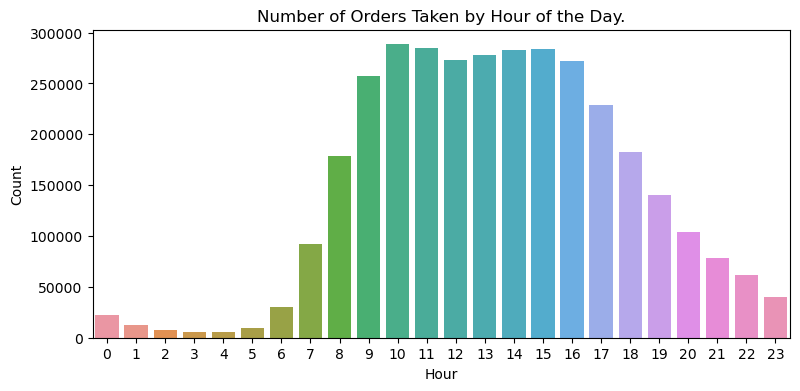

In [9]:
plt.figure(figsize = (9,4))
sns.countplot(x='order_hour_of_day', data= df_orders)
plt.title('Number of Orders Taken by Hour of the Day.')
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()

Looking at the above graph looks like most of the instacart orders are placed from 9:00 AM  to 5:00 PM





#Data Manipulation 

Append the df_products, df_aisles, df_departments together to df_ord_pro_prior

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import gc
color = sns.color_palette()

%matplotlib inline



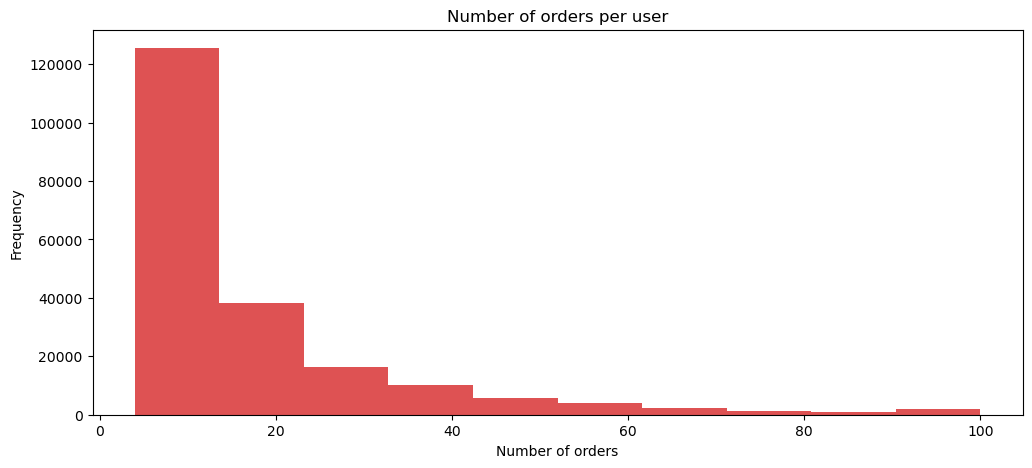

In [11]:
plt.figure(figsize=(12,5))
df_orders.user_id.value_counts().plot.hist(alpha=0.8, color=color[3])
plt.title("Number of orders per user")
plt.xlabel("Number of orders")
plt.ylabel("Frequency")
plt.show()

NUMBER OF ORDERS PER USER

In [12]:
op_prior_df = pd.read_csv("/Users/poojabj/Documents/Instacart Analysis/order_products__prior.csv")
print(op_prior_df.shape)
op_train_df = pd.read_csv("/Users/poojabj/Documents/Instacart Analysis/order_products__train.csv")
print(op_train_df.shape)

(32434489, 4)
(1384617, 4)


In [13]:
#Number of products per Order
#Concatenate op_prior_df and op_train_df into one data frame
op_concate_df = op_prior_df.append(op_train_df, ignore_index=True)
op_concate_df.shape

/var/folders/zz/pcvwt1814fs09dxdtmnwz_h80000gn/T/ipykernel_90578/1771890629.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  op_concate_df = op_prior_df.append(op_train_df, ignore_index=True)


(33819106, 4)

In [14]:
#Check for duplicates within same order_id
#Are there any duplicate product_id within the same order?
op_dedup_len = op_concate_df[['order_id','product_id']].drop_duplicates().shape[0]
print(op_dedup_len != 33819106)

False


In [15]:
order_pd_cnt = op_concate_df.groupby(['order_id']).size().value_counts()

                                NUMBER OF ORDERS PLACED PER DAY OF WEEK

In [16]:
order_dow_cnt = df_orders['order_dow'].value_counts()

/Users/poojabj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


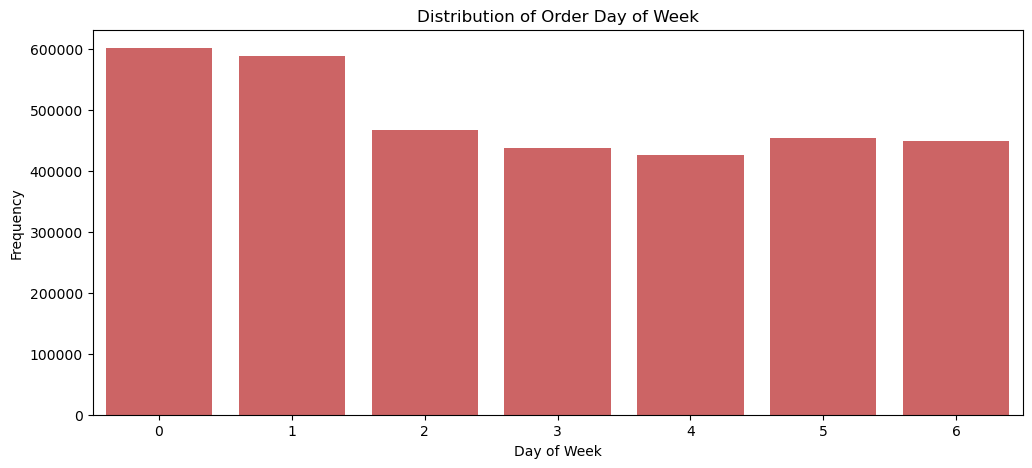

In [17]:
plt.figure(figsize=(12,5))
sns.barplot(order_dow_cnt.index, order_dow_cnt.values, alpha=0.8, color=color[3])
plt.title("Distribution of Order Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Frequency")
plt.show()

Day of week O and 1 is weekends with the most number of orders placed

In [18]:
#Order Hour of Day
order_hour_cnt = df_orders['order_hour_of_day'].value_counts()


/Users/poojabj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


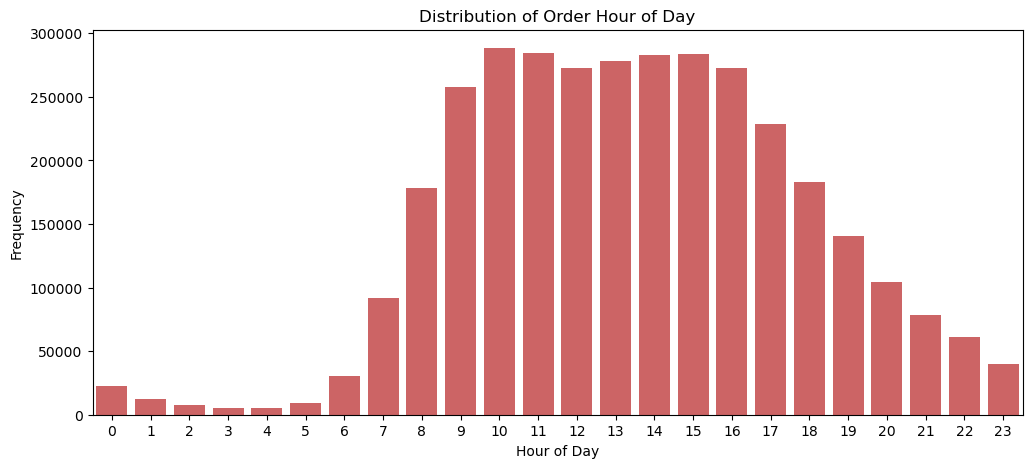

In [19]:
plt.figure(figsize=(12,5))
sns.barplot(order_hour_cnt.index, order_hour_cnt.values, alpha=0.8, color=color[3])
plt.title("Distribution of Order Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.show()


                            FREQUENCY OF ORDER HOUR OF DAY by DAY OF WEEK

MERGING Product ,department,aisle and Orderproduct

In [20]:


aisles_df = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/aisles.csv')
print(aisles_df.shape)
dpmt_df = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/departments.csv')
print(dpmt_df.shape)
products_df = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/products.csv')
print(products_df.shape)



(134, 2)
(21, 2)
(49688, 4)


In [21]:
products = pd.merge(left=products_df, right=dpmt_df, on='department_id', how='left')
products = pd.merge(left=products, right=aisles_df, on='aisle_id', how='left')
products.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [22]:
del aisles_df, dpmt_df, products_df
gc.collect()

14450

In [23]:
products.isnull().sum()


product_id       0
product_name     0
aisle_id         0
department_id    0
department       0
aisle            0
dtype: int64

In [24]:
#Does one aisel belong to different departments?
#Check for duplicate records
aisel_dpmt = products[['aisle','department']].drop_duplicates().groupby('aisle')['department'].value_counts()
aisel_dpmt.head()

aisle                   department   
air fresheners candles  household        1
asian foods             international    1
baby accessories        babies           1
baby bath body care     babies           1
baby food formula       babies           1
Name: department, dtype: int64

In [25]:
(aisel_dpmt==1).all()


True

Here we notice that an aisle can only belong to one department

In [26]:
#Number of aisles per department
aisel_dpmt = pd.DataFrame(aisel_dpmt)
aisel_dpmt = aisel_dpmt.rename(columns={'department':'count'})
aisel_dpmt = aisel_dpmt.reset_index()
num_aisel_dpmt = aisel_dpmt.groupby('department').size()

In [27]:
num_aisel_dpmt = num_aisel_dpmt.sort_values(ascending=False)

/Users/poojabj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'personal care'),
  Text(1, 0, 'pantry'),
  Text(2, 0, 'frozen'),
  Text(3, 0, 'snacks'),
  Text(4, 0, 'dairy eggs'),
  Text(5, 0, 'household'),
  Text(6, 0, 'beverages'),
  Text(7, 0, 'meat seafood'),
  Text(8, 0, 'alcohol'),
  Text(9, 0, 'canned goods'),
  Text(10, 0, 'deli'),
  Text(11, 0, 'dry goods pasta'),
  Text(12, 0, 'produce'),
  Text(13, 0, 'bakery'),
  Text(14, 0, 'breakfast'),
  Text(15, 0, 'babies'),
  Text(16, 0, 'international'),
  Text(17, 0, 'bulk'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'other'),
  Text(20, 0, 'missing')])

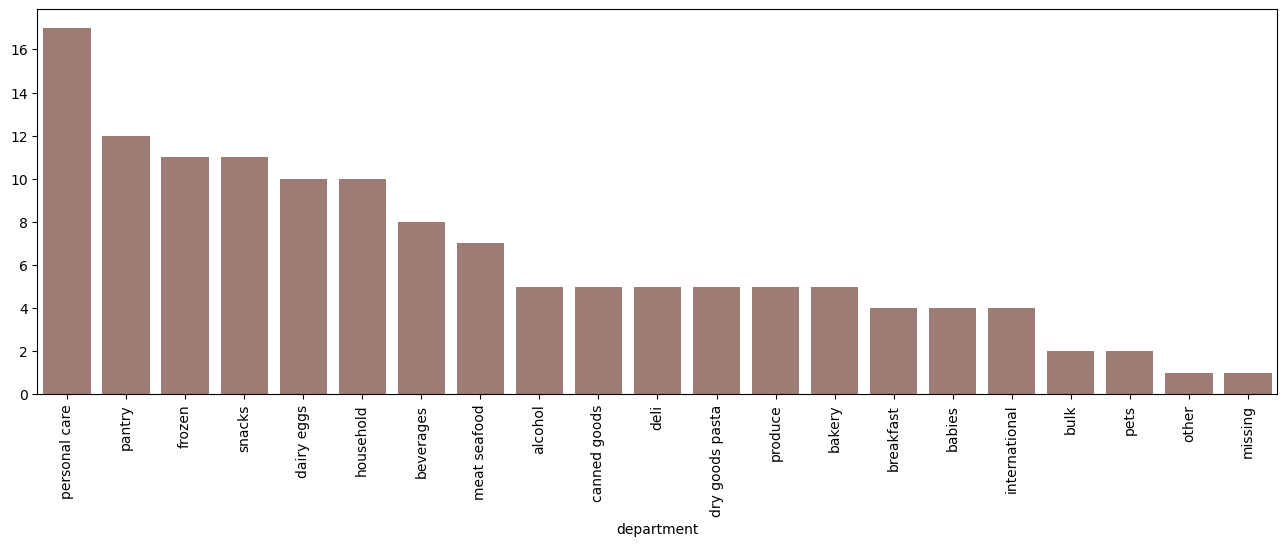

In [28]:
plt.figure(figsize=(16,5))
sns.barplot(num_aisel_dpmt.index, num_aisel_dpmt.values, color=color[5], alpha=.8)
plt.xticks(rotation = 'vertical')

Here we notice that personal care items have 17 aisles assigned to them

In [29]:
#Number of products per department
pd_dpmt = products[['product_name','department']].groupby('department')['product_name'].count()
pd_dpmt = pd_dpmt.sort_values(ascending=False)

/Users/poojabj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'personal care'),
  Text(1, 0, 'snacks'),
  Text(2, 0, 'pantry'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'frozen'),
  Text(5, 0, 'dairy eggs'),
  Text(6, 0, 'household'),
  Text(7, 0, 'canned goods'),
  Text(8, 0, 'dry goods pasta'),
  Text(9, 0, 'produce'),
  Text(10, 0, 'bakery'),
  Text(11, 0, 'deli'),
  Text(12, 0, 'missing'),
  Text(13, 0, 'international'),
  Text(14, 0, 'breakfast'),
  Text(15, 0, 'babies'),
  Text(16, 0, 'alcohol'),
  Text(17, 0, 'pets'),
  Text(18, 0, 'meat seafood'),
  Text(19, 0, 'other'),
  Text(20, 0, 'bulk')])

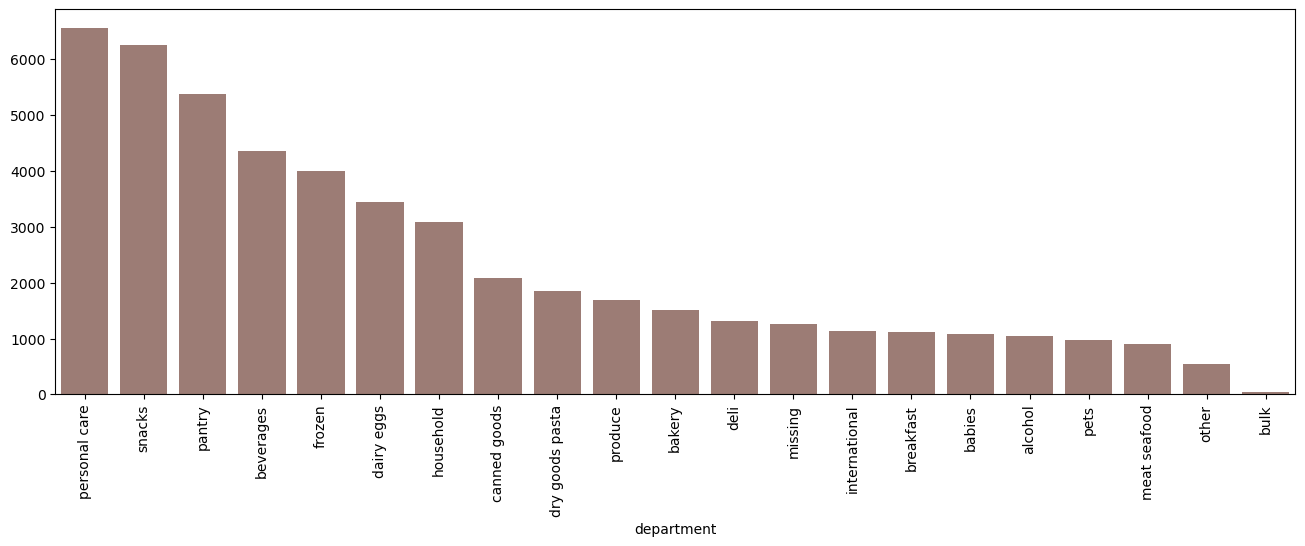

In [30]:
plt.figure(figsize=(16,5))
sns.barplot(pd_dpmt.index, pd_dpmt.values, color=color[5], alpha=.8)
plt.xticks(rotation = 'vertical')

In [31]:
indexes = np.linspace(0, len(op_concate_df), num=100, dtype=np.int32)


Here we notice that we have 6000 products in personal care 

In [32]:
indexes = np.linspace(0, len(op_concate_df), num=100, dtype=np.int32)

In [33]:
len_op_concat = len(op_concate_df)

In [34]:
order_pd = pd.merge(left=op_concate_df.loc[:indexes[1],:], right=products, on='product_id', how='left')

In [35]:
op_concate_df = op_concate_df.loc[indexes[1]:len_op_concat,:]


In [36]:
%%time
for i in range(len(indexes)-2):
    temp = pd.merge(left=op_concate_df.loc[:indexes[i+2],:], right=products, on='product_id', how='left')
    if i == len(indexes)-3:
        del op_concate_df
    else:
        op_concate_df = op_concate_df.loc[indexes[i+2]:len_op_concat,:]
    order_pd = order_pd.append(temp, ignore_index=True)

<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

CPU times: user 34 s, sys: 52.1 s, total: 1min 26s
Wall time: 1min 40s


seems like banana was sold the most

THE Produce department has more products

In [37]:
#which aisle has most selling product
top = 15
bestsellers_aisle = order_pd.groupby('aisle').size()
bestsellers_aisle = bestsellers_aisle.sort_values(ascending=False)
bestsellers_aisle = bestsellers_aisle[:top]

/Users/poojabj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'fresh fruits'),
  Text(1, 0, 'fresh vegetables'),
  Text(2, 0, 'packaged vegetables fruits'),
  Text(3, 0, 'yogurt'),
  Text(4, 0, 'packaged cheese'),
  Text(5, 0, 'milk'),
  Text(6, 0, 'water seltzer sparkling water'),
  Text(7, 0, 'chips pretzels'),
  Text(8, 0, 'soy lactosefree'),
  Text(9, 0, 'bread'),
  Text(10, 0, 'refrigerated'),
  Text(11, 0, 'frozen produce'),
  Text(12, 0, 'ice cream ice'),
  Text(13, 0, 'crackers'),
  Text(14, 0, 'energy granola bars')])

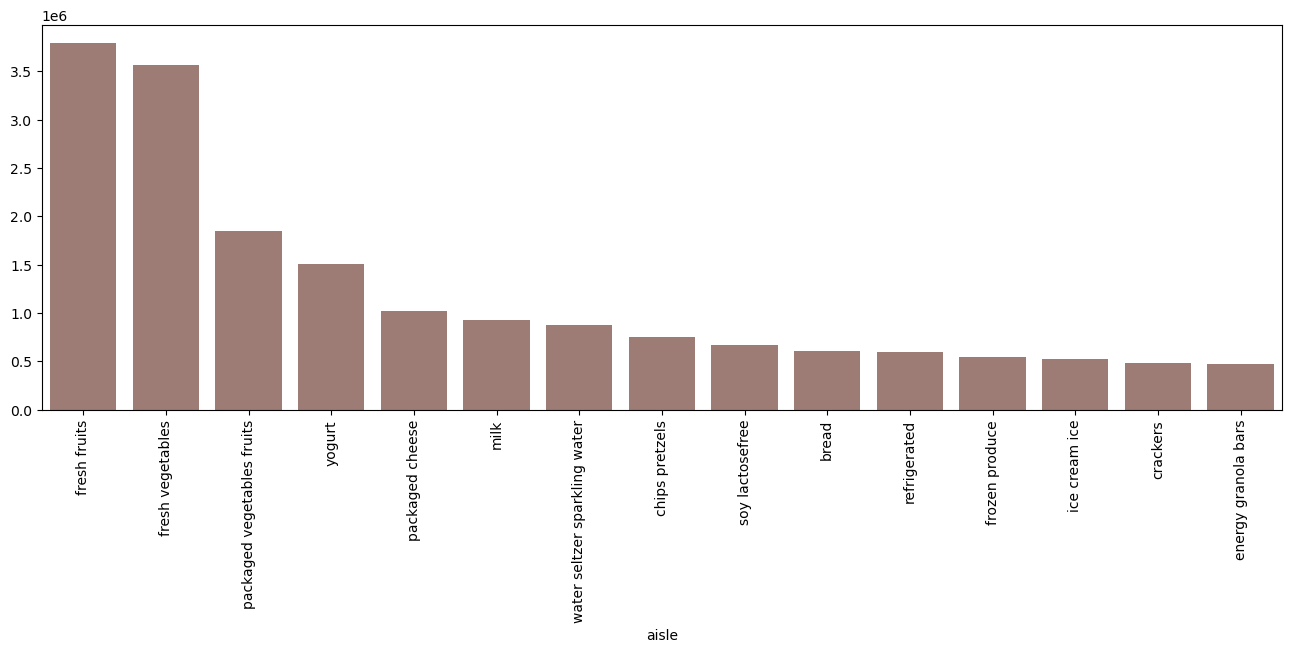

In [38]:
plt.figure(figsize=(16,5))
sns.barplot(bestsellers_aisle.index, bestsellers_aisle.values, color=color[5], alpha=.8)
plt.xticks(rotation = 'vertical')

Fresh fruits aisle has more products

In [39]:
#Most reordered products

most_reorder = order_pd.groupby('product_name')['reordered'].agg(['sum','count'])
most_reorder['reordered'] = most_reorder['sum'] / most_reorder['count']
most_reorder = most_reorder.sort_values('reordered',ascending=False)
most_reorder = most_reorder[:2*top]

In [40]:
most_reorder


,sum,count,reordered
product_name,,,
Raw Veggie Wrappers,65,69,0.942029
Serenity Ultimate Extrema Overnight Pads,84,90,0.933333
Orange Energy Shots,12,13,0.923077
Chocolate Love Bar,94,102,0.921569
Soy Powder Infant Formula,32,35,0.914286
Simply Sleep Nighttime Sleep Aid,41,45,0.911111
"Energy Shot, Grape Flavor",20,22,0.909091
Russian River Valley Reserve Pinot Noir,27,30,0.900000
Bars Peanut Butter,62,69,0.898551


#Seems like these products have very high reordered ratio even if they have not many sales in total.



In [41]:
#Most Reordered -How about those with large sales?
most_reorder = order_pd.groupby('product_name')['reordered'].agg(['sum','count'])
most_reorder = most_reorder[most_reorder['count'] > 10000]
most_reorder['reordered'] = most_reorder['sum'] / most_reorder['count']
most_reorder = most_reorder.sort_values('reordered',ascending=False)
most_reorder = most_reorder[:top]

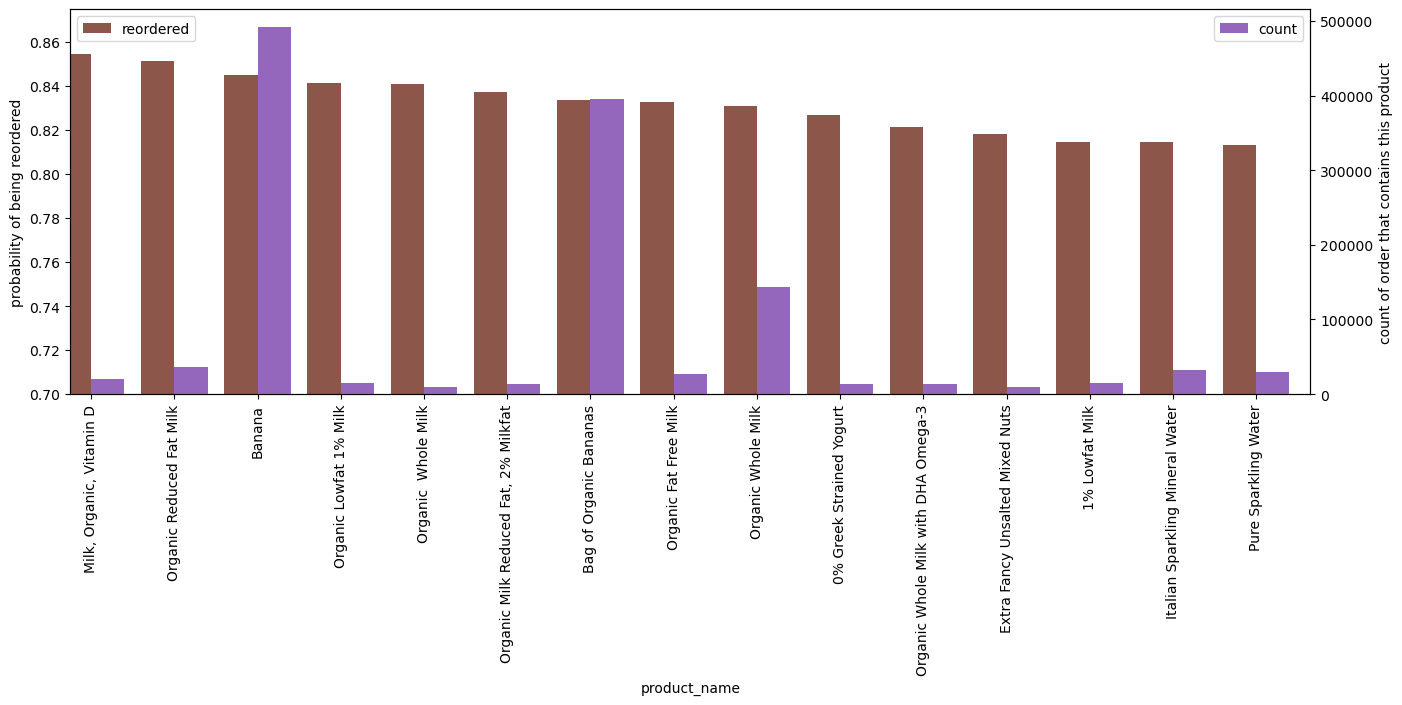

In [42]:
fig = plt.figure(figsize=(16,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

most_reorder['reordered'].plot(kind='bar', color=color[5], ax=ax, width=width, position=1)
most_reorder['count'].plot(kind='bar', color=color[4], ax=ax2, width=width, position=0)

ax.set_ylabel('probability of being reordered')
ax2.set_ylabel('count of order that contains this product')
ax.set_ylim(.7,.875)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=2)

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2, labels2, loc=0)

plt.xlabel(str(most_reorder.index[0]))  # Convert the index to a string or choose a specific element

plt.show()

It seems like even some products have not many historical sale, once they were bought by a user, it's very likely they will be reordered.

In [43]:
most_reorder_dpmt = order_pd.groupby('department')['reordered'].agg(['sum','count'])
most_reorder_dpmt['reordered'] = most_reorder_dpmt['sum'] / most_reorder_dpmt['count']
most_reorder_dpmt = most_reorder_dpmt.sort_values('reordered',ascending=False)

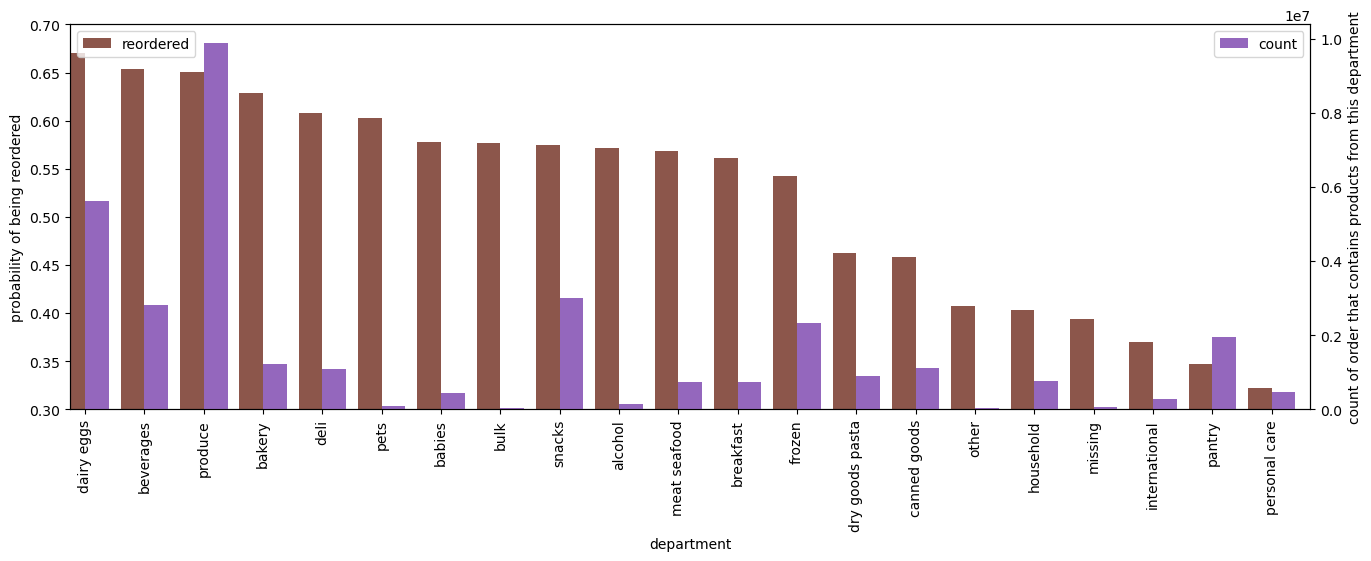

In [44]:
fig = plt.figure(figsize=(16,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

most_reorder_dpmt['reordered'].plot(kind='bar', color=color[5], ax=ax, width=width, position=1)
most_reorder_dpmt['count'].plot(kind='bar', color=color[4], ax=ax2, width=width, position=0)

ax.set_ylabel('probability of being reordered')
ax2.set_ylabel('count of order that contains products from this department')
ax.set_ylim(.3,.7)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=2)

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2, labels2, loc=0)

plt.xlabel(str(most_reorder.index[0]))  # Convert the index to a string or choose a specific element

plt.show()


Looks like produce and dairy eggs departments have both large sales and reordered demand.

However, some departments don't have large sales in general (like pets), their reorder rate is quite high.

In [45]:
#Which aisles have the most reordered products
most_reorder_aisle = order_pd.groupby('aisle')['reordered'].agg(['sum','count'])
most_reorder_aisle['reordered'] = most_reorder_aisle['sum'] / most_reorder_aisle['count']
most_reorder_aisle = most_reorder_aisle.sort_values('reordered',ascending=False)

In [46]:
most_reorder_aisle = most_reorder_aisle[:top]
most_reorder_aisle

,sum,count,reordered
aisle,,,
milk,722128,923659,0.781812
water seltzer sparkling water,640989,878153,0.729929
fresh fruits,2726256,3792667,0.718823
eggs,333408,472010,0.706358
soy lactosefree,460071,664495,0.692362
packaged produce,200319,289488,0.691977
yogurt,1034961,1507588,0.686501
cream,226358,330360,0.685186
bread,408012,608472,0.670552


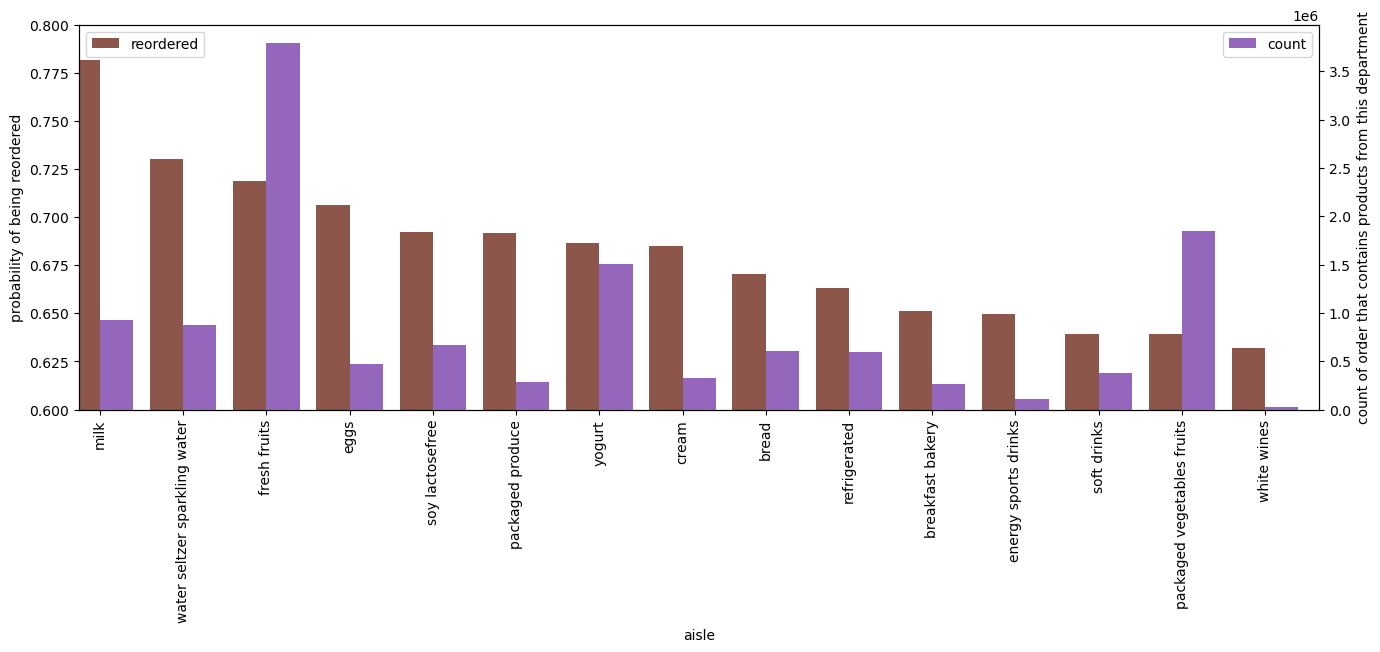

In [47]:
fig = plt.figure(figsize=(16,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

most_reorder_aisle['reordered'].plot(kind='bar', color=color[5], ax=ax, width=width, position=1)
most_reorder_aisle['count'].plot(kind='bar', color=color[4], ax=ax2, width=width, position=0)

ax.set_ylabel('probability of being reordered')
ax2.set_ylabel('count of order that contains products from this department')
ax.set_ylim(.6,.8)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=2)

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2, labels2, loc=0)

plt.xlabel(str(most_reorder.index[0]))  # Convert the index to a string or choose a specific element

plt.show()





                                           MARKET BASKET ANALYSIS

In [48]:
from zipfile import ZipFile  # working with zipped input
!pip install mlxtend
from mlxtend.frequent_patterns import fpgrowth, association_rules  # MBA
from scipy import sparse  # sparse matrices
import numpy as np
import pandas as pd
##import osimport as os 
import pandas as pd
import numpy as np
#from apriori import apriori
#from collections import Counter
#from datetime import datetime
#from itertools import combinations
import matplotlib.pyplot as plt

In [49]:
aisles = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/aisles.csv')
aisles.dtypes

aisle_id     int64
aisle       object
dtype: object

In [50]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


Here we have the names of the runners and the primary key for their identification. Let's check now for missing values:



In [51]:
aisles.isna().sum(axis = 0)

aisle_id    0
aisle       0
dtype: int64

As there are no missing files, no special treatment for this database will be necessary.

In [52]:
departments = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/departments.csv')
departments.dtypes

department_id     int64
department       object
dtype: object

In [53]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


As with aisles, here we have two columns as the primary key and the name of the department.

In [54]:
departments.isna().sum(axis = 0)

department_id    0
department       0
dtype: int64

In [55]:
products = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/products.csv')


In [56]:
products.dtypes

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [57]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


We can see that we have something new here, the appearance of foreign keys, the products are connected to the entrance and the corridor. It is possible to check the names of these corridors and departments:

In [58]:
aisles[aisles['aisle_id'] == 61]

,aisle_id,aisle
60,61,cookies cakes


In [59]:
departments[departments['department_id'] == 19]

,department_id,department
18,19,snacks


In [60]:
products.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


The "count" shows equal values, indicating that there are no missing values.

In [61]:
orders = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/orders.csv')
orders.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [62]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [63]:
orders.shape

(3421083, 7)

In [64]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In this column, there is already the separation of the database in training and testing. We will filter only the "prior":

In [65]:
orders = orders[orders.eval_set == 'prior']

We will only use "prior" records
as this column does not represent any information, it is only the division of the database, we will exclude it:

In [66]:
orders.drop('eval_set', axis = 1, inplace = True)
orders.isna().sum(axis = 0)

/var/folders/zz/pcvwt1814fs09dxdtmnwz_h80000gn/T/ipykernel_90578/1738967791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.drop('eval_set', axis = 1, inplace = True)


order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

Every user makes his first and is marked with NaN because he had never made a purchase there before, so there is no value for days before this purchase, after all it was his first. Therefore, this NaN is not considered a missing value. We can locate where these first orders placed by users are located:

In [67]:
orders.loc[orders.days_since_prior_order.isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
11,2168274,2,1,2,11,NaN
26,1374495,3,1,1,14,NaN
39,3343014,4,1,6,11,NaN
45,2717275,5,1,3,12,NaN
...,...,...,...,...,...,...
3420930,969311,206205,1,4,12,NaN
3420934,3189322,206206,1,3,18,NaN
3421002,2166133,206207,1,6,19,NaN
3421019,2227043,206208,1,1,15,NaN





Let's see this with just 100 number of orders:

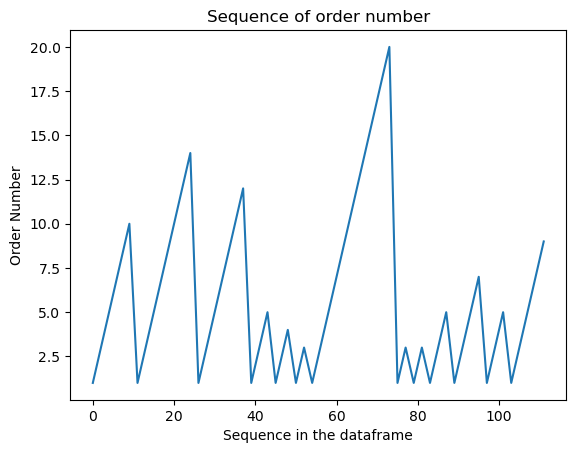

In [68]:
plt.plot(orders.order_number[:100])
plt.title('Sequence of order number')
plt.xlabel('Sequence in the dataframe')
plt.ylabel('Order Number');

This graph shows us the number of orders made by 100 users, the first user had 10 order numbers, right after that we see a low point that indicates the second user, this grows until it shows a number of orders of approximately 13 or 14. Within those 100 users, the one that reached 20 was placed in more orders. Let's view the distribution considering the day of the week (dow) and the hours of the day:

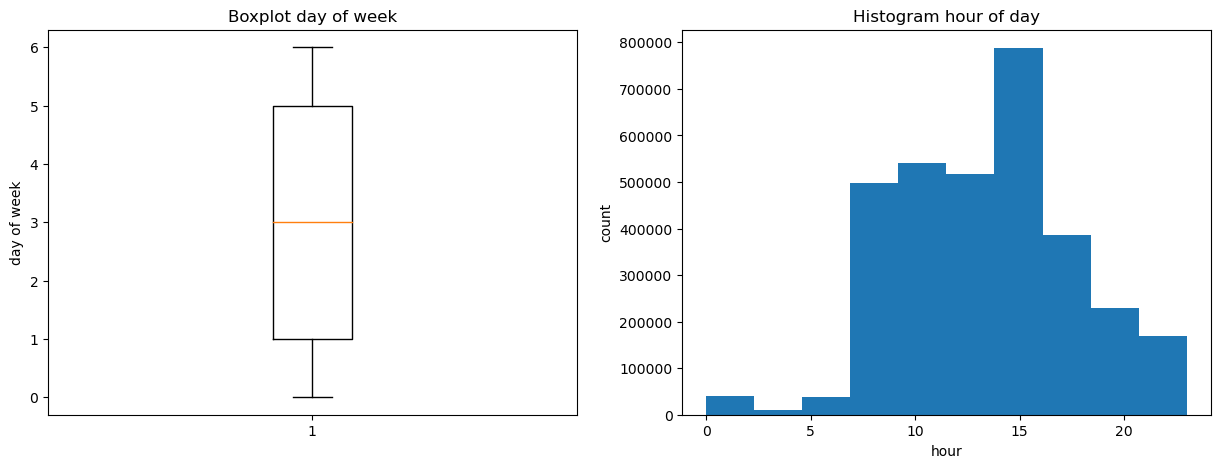

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].boxplot(orders.order_dow)
ax[0].set_title('Boxplot day of week')
ax[0].set_ylabel('day of week')
ax[1].hist(orders.order_hour_of_day)
ax[1].set_title('Histogram hour of day')
ax[1].set_xlabel('hour')
ax[1].set_ylabel('count');

The average purchase is indicated by the orange line, showing that it is day 3. We also can see we have some orders in the hour 0 but the most orders are in hours between 14 and 16. Finally an analysis on days_since_prior_order:

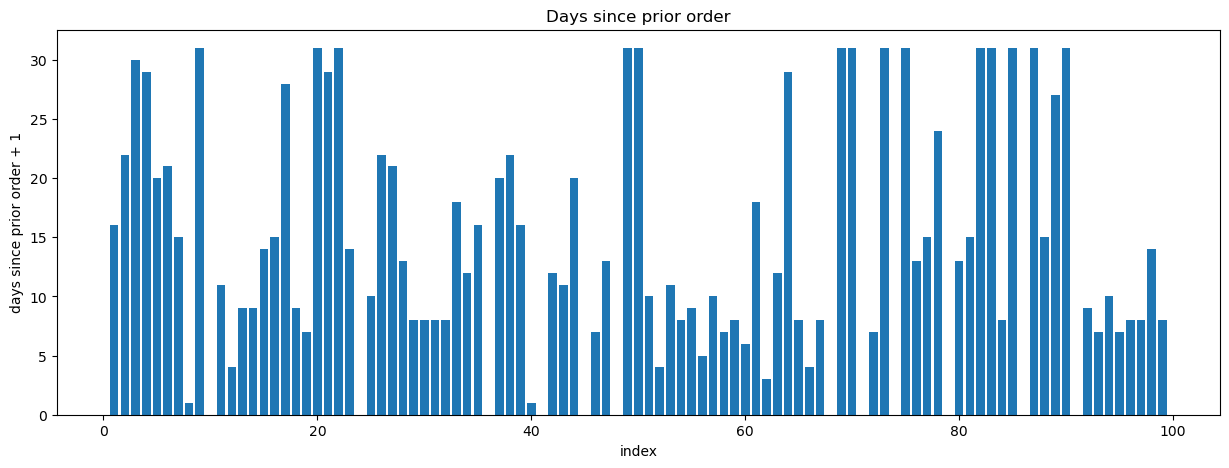

In [70]:
plt.figure(figsize = (15,5))
plt.bar(range(100), orders.days_since_prior_order[:100] + 1)
plt.title('Days since prior order')
plt.xlabel('index')
plt.ylabel('days since prior order + 1');

Here we see how many days later he returned after making the last purchase. Using the first user, we see that it considered NaN and counted 0 days but soon afterwards he said that it returned after 16/17 days for a new purchase. The blanks mean the NaN.

In [71]:
order_products = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/order_products__train.csv')
order_products.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [72]:
order_products

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


The order_id is related to the customer, the add_to_cart_order is the order to which the product is added to the cart, finally the reordered means if the product has already been ordered in previous purchases (1 is when it was previously purchased and 0 the first time you buy the product).

In [73]:
order_products.isna().sum(axis=0)

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [74]:
#STEP 1 - EXPLORATORY DATA ANALYSIS
orders_apriori = orders.copy()
orders_user = orders.groupby('user_id')['order_number'].max() #it takes the maximum number of orders placed
orders_user.head()

user_id
1    10
2    14
3    12
4     5
5     4
Name: order_number, dtype: int64

Let's create a data frame that returns not only the user_idand the maximum number of order_number but also the products purchased by the user.

In [75]:
products_user = orders[['order_id', 'user_id']].merge(
    order_products[['order_id', 'add_to_cart_order']].groupby('order_id').max().rename({'add_to_cart_order': 'order_size'}, axis = 1),
                                                                                        on = 'order_id')
products_user

,order_id,user_id,order_size


In [76]:
products_user[products_user.order_id == 2]

,order_id,user_id,order_size


Let's change the data frame where we can view the products by user_id and the total of products purchased:



In [77]:
products_user = products_user.drop('order_id', axis = 1).groupby('user_id')['order_size'].sum()
products_user

Series([], Name: order_size, dtype: int64)

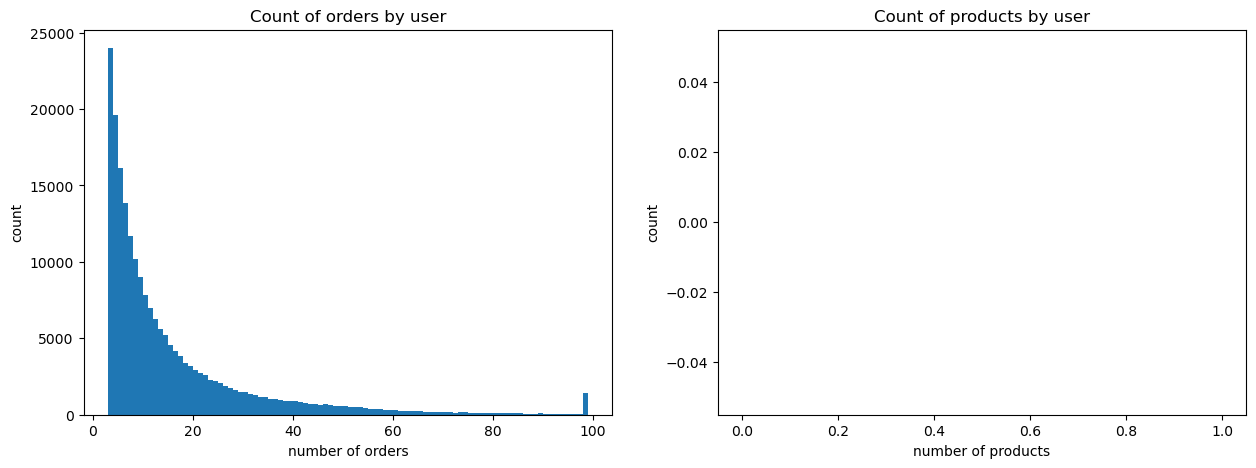

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].hist(orders_user, bins = max(orders_user) - min(orders_user))
ax[0].set_title('Count of orders by user')
ax[0].set_xlabel('number of orders')
ax[0].set_ylabel('count')

ax[1].hist(products_user, bins = 100)
ax[1].set_title('Count of products by user')
ax[1].set_xlabel('number of products')
ax[1].set_ylabel('count');

The graphs show the number of customers who performed these operations. In the first graph we see that more than 20000 customers have only made approximately 3 purchases in this market and that less than 5000 people have made more than 20 purchases. Next to the number 100 it has a peak, which can be a pattern of the database where purchases over 100 return to the value of 99 or 100 purchases, accumulating a number of people who may have made large numbers but the data only return up to 100 shopping. The second graph shows us that more than 50,000 customers have purchased approximately less than 50 products. And that less than 10,000 buy more than 500 products.

We will now delete the user_id and order_id columns because they will not be necessary for the creation of the membership rules

In [79]:
orders_apriori.drop(['user_id', 'order_id'], axis = 1, inplace=True)
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,2,8,NaN
1,2,3,7,15.0
2,3,3,12,21.0
3,4,4,7,29.0
4,5,4,15,28.0


In [80]:
#Order Number
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


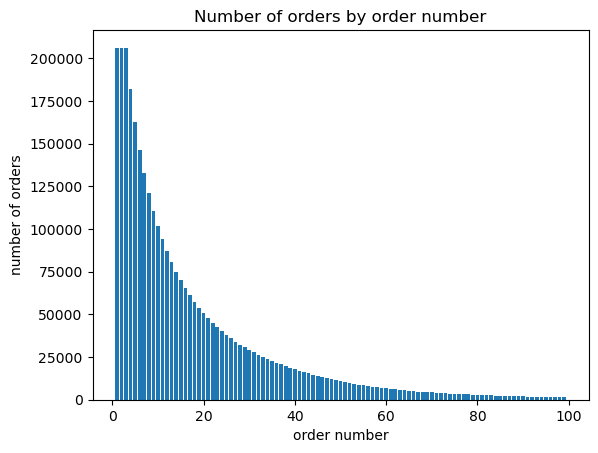

In [81]:
orders_by_order_number = orders.order_number.value_counts()
plt.bar(orders_by_order_number.index, orders_by_order_number)
plt.title('Number of orders by order number')
plt.xlabel('order number')
plt.ylabel('number of orders');

The graph makes it visible that we had over 200000 orders from order_number = 1

In [82]:

def order_number_categorical(order_number):
  if order_number in range(3):
    return 'order_number_1-3'
  if order_number in range(3, 5):
    return 'order_number_4-5'
  if order_number in range(5, 10):
    return 'order_number_6-10'
  if order_number in range(10, 20):
    return 'order_number_11-20'
  if order_number in range(20, 40):
    return 'order_number_21-40'
  if order_number in range(40, 60):
    return 'order_number_41-60'
  if order_number >= 60:
    return 'order_number_60+'

In [83]:
orders_apriori.order_number = orders_apriori.order_number.map(order_number_categorical)
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,2,8,NaN
1,order_number_1-3,3,7,15.0
2,order_number_4-5,3,12,21.0
3,order_number_4-5,4,7,29.0
4,order_number_6-10,4,15,28.0


In [84]:
#Day of Week

#Total orders per day of the week:

orders_by_dow = orders.order_dow.value_counts()
orders_by_dow

0    557772
1    556705
2    441955
5    425982
6    418848
3    412400
4    401212
Name: order_dow, dtype: int64

In [85]:
#Total products per day of the week:

products_by_dow = orders[['order_id', 'order_dow']].merge(
    order_products[['order_id', 'add_to_cart_order']].groupby('order_id').max().rename({'add_to_cart_order': 'order_size'}, axis = 1),
    on = 'order_id')
products_by_dow = products_by_dow.drop('order_id', axis=1).groupby('order_dow')['order_size'].sum()
products_by_dow

Series([], Name: order_size, dtype: int64)

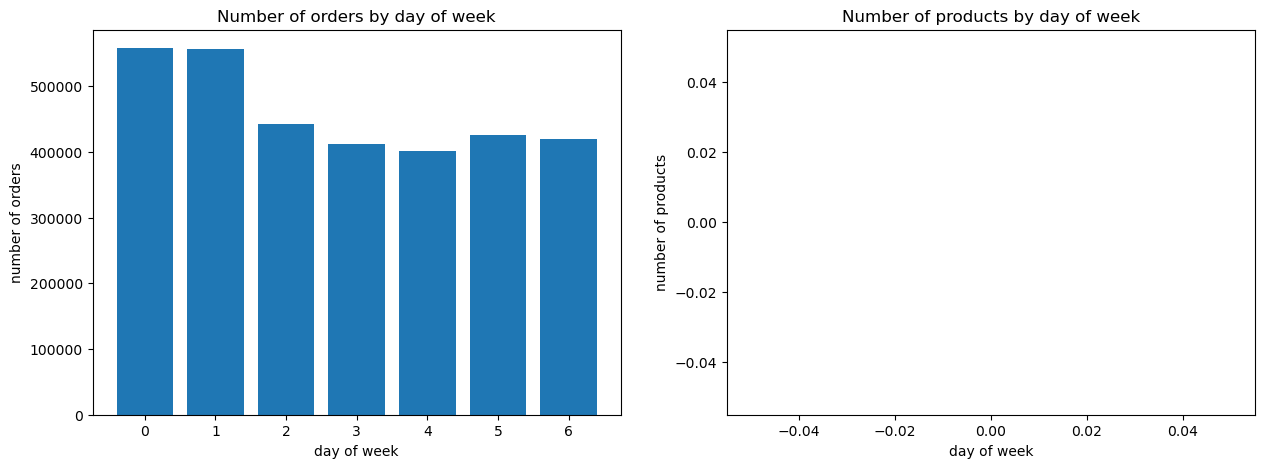

In [86]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(orders_by_dow.index, orders_by_dow)
ax[0].set_title('Number of orders by day of week')
ax[0].set_xlabel('day of week')
ax[0].set_ylabel('number of orders')

ax[1].bar(products_by_dow.index, products_by_dow)
ax[1].set_title('Number of products by day of week')
ax[1].set_xlabel('day of week')
ax[1].set_ylabel('number of products');

In the first graph we can see that the day of week 0 has more than 500000 orders, as well as day 1. From day 2 the numbers fall to less than 400500 orders per day. The second graph shows that on day 0 we have more than 6 (le6) products ordered. From day 2 there are less than 5 (le6) products ordered.

Now let's create the function for transformation into a categorical variable. The graphs show a great movement on days 0 and 1, so they will be considered weekend (Saturday and Sunday)

In [87]:
def dow_categorical(dow):
    if dow in [0, 1]:
        return 'weekend'
    else:
        return 'weekday'

In [88]:
orders_apriori.order_dow = orders_apriori.order_dow.map(dow_categorical)
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,weekday,8,NaN
1,order_number_1-3,weekday,7,15.0
2,order_number_4-5,weekday,12,21.0
3,order_number_4-5,weekday,7,29.0
4,order_number_6-10,weekday,15,28.0


In [89]:
#Hour of Day
orders_by_hour = orders.order_hour_of_day.value_counts()
orders_by_hour

10    271885
11    268006
15    266132
14    265556
13    261174
12    256206
16    255949
9     243496
17    214080
18    170998
8     168321
19    131620
20     98109
7      86656
21     73436
22     57540
23     37613
6      28792
0      21372
1      11596
5       8972
2       7070
4       5175
3       5120
Name: order_hour_of_day, dtype: int64

Let's create a chart to view the number of orders per hour and the products per hour:

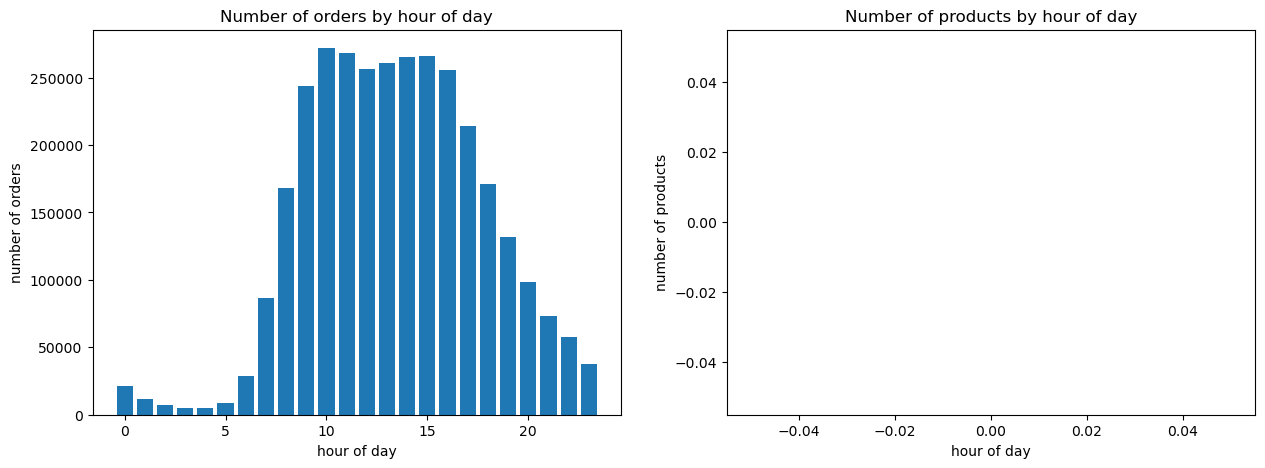

In [90]:
products_by_hour = orders[['order_id', 'order_hour_of_day']].merge(
    order_products[['order_id', 'add_to_cart_order']].groupby('order_id').max().rename({'add_to_cart_order': 'order_size'}, axis = 1),
    on = 'order_id')

products_by_hour = products_by_hour.drop('order_id', axis = 1).groupby('order_hour_of_day')['order_size'].sum()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(orders_by_hour.index, orders_by_hour)
ax[0].set_title('Number of orders by hour of day')
ax[0].set_xlabel('hour of day')
ax[0].set_ylabel('number of orders')

ax[1].bar(products_by_hour.index, products_by_hour)
ax[1].set_title('Number of products by hour of day')
ax[1].set_xlabel('hour of day')
ax[1].set_ylabel('number of products');

Graph 1 shows us that the number of orders is more distributed between the hours 9 and 17 hours. And the Graph 2 shows the same. We can see that we don't have so many diferent between the graphs

In [91]:
# conversion to categorical:

def hour_categorical(hour):
  if hour in range(7):
    return 'early_hours'
  if hour in range(7,10):
    return 'hour_' + str(hour)
  if hour in range(10, 17):
    return 'peak_hours'
  if hour in range(17, 24):
    return 'hour_' + str(hour)

In [92]:
orders_apriori.order_hour_of_day = orders_apriori.order_hour_of_day.map(hour_categorical)
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,weekday,hour_8,NaN
1,order_number_1-3,weekday,hour_7,15.0
2,order_number_4-5,weekday,peak_hours,21.0
3,order_number_4-5,weekday,hour_7,29.0
4,order_number_6-10,weekday,peak_hours,28.0


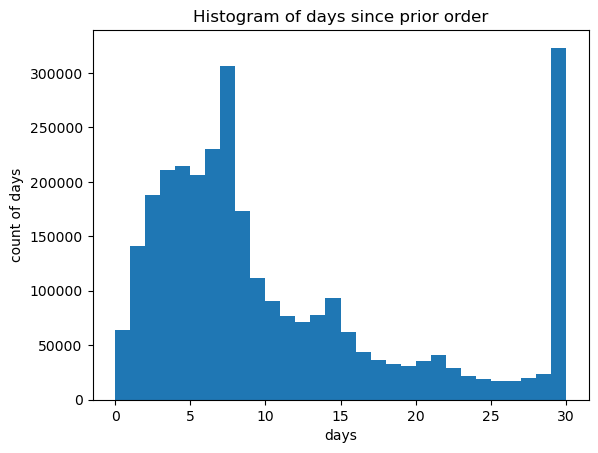

In [93]:
#Days since prior order
plt.hist(orders.days_since_prior_order, bins = 30)
plt.title('Histogram of days since prior order')
plt.xlabel('days')
plt.ylabel('count of days');

The graph shows us that a large number of customers return after 28 days. It also shows us that there is a big movement in a few days from the previous purchase.

In [94]:
# conversion to categorical:

def interval_categorical(interval):
    if np.isnan(interval):
        return 'first_order'
    elif interval in [7, 14, 21]:
        return 'interval_weekly'
    elif interval == 30:
        return 'interval_30+'
    else:
        return 'interval_others'

In [95]:
orders_apriori.days_since_prior_order = orders_apriori.days_since_prior_order.map(interval_categorical)
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,weekday,hour_8,first_order
1,order_number_1-3,weekday,hour_7,interval_others
2,order_number_4-5,weekday,peak_hours,interval_weekly
3,order_number_4-5,weekday,hour_7,interval_others
4,order_number_6-10,weekday,peak_hours,interval_others


#Order Products
Reordered Products: Create a dictionary to associate ids with product names.

In [96]:
products_id_to_name = {k: v for k, v in zip(products.product_id, products.product_name)}
print(products_id_to_name)

{1: 'Chocolate Sandwich Cookies', 2: 'All-Seasons Salt', 3: 'Robust Golden Unsweetened Oolong Tea', 4: 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce', 5: 'Green Chile Anytime Sauce', 6: 'Dry Nose Oil', 7: 'Pure Coconut Water With Orange', 8: "Cut Russet Potatoes Steam N' Mash", 9: 'Light Strawberry Blueberry Yogurt', 10: 'Sparkling Orange Juice & Prickly Pear Beverage', 11: 'Peach Mango Juice', 12: 'Chocolate Fudge Layer Cake', 13: 'Saline Nasal Mist', 14: 'Fresh Scent Dishwasher Cleaner', 15: 'Overnight Diapers Size 6', 16: 'Mint Chocolate Flavored Syrup', 17: 'Rendered Duck Fat', 18: 'Pizza for One Suprema  Frozen Pizza', 19: 'Gluten Free Quinoa Three Cheese & Mushroom Blend', 20: 'Pomegranate Cranberry & Aloe Vera Enrich Drink', 21: 'Small & Medium Dental Dog Treats', 22: 'Fresh Breath Oral Rinse Mild Mint', 23: 'Organic Turkey Burgers', 24: 'Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants', 25: 'Salted Caramel Lean Protein & Fiber Bar', 26: 'Fancy F

In [97]:
#create a new data frame:

order_products_names = order_products.copy()
order_products_names['product_name'] = order_products_names.product_id.map(lambda x: products_id_to_name[x])
order_products_names

,order_id,product_id,add_to_cart_order,reordered,product_name
0,1,49302,1,1,Bulgarian Yogurt
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese
2,1,10246,3,0,Organic Celery Hearts
3,1,49683,4,0,Cucumber Kirby
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil
...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water
1384613,3421063,35548,4,1,Twice Baked Potatoes
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk
1384615,3421070,16953,2,1,Creamy Peanut Butter


In [98]:
#count how many times the product was purchased for the first time and how many times a product was repurchased:

reorder_proportion = pd.crosstab(order_products_names.product_name, order_products_names.reordered)
reorder_proportion

reordered,0,1
product_name,,
#2 Coffee Filters,14,8
#2 Cone White Coffee Filters,1,0
#2 Mechanical Pencils,1,0
#4 Natural Brown Coffee Filters,5,1
& Go! Hazelnut Spread + Pretzel Sticks,4,6
...,...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,4,0
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,1,1
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,3,3


In this case, 0 indicates the number of times the product was purchased for the first time and 1 indicates the number of times it was repurchased. Ordering the products that were most purchased for the first time:

In [99]:
reorder_proportion.sort_values(by = 0, ascending=False)

reordered,0,1
product_name,,
Organic Strawberries,2291,8603
Large Lemon,2212,5923
Banana,2169,16557
Bag of Organic Bananas,2118,13362
Limes,1799,4234
...,...,...
Greek Dressing,0,1
"Cheese, Aged Dutch, Vincent",0,1
Greek Mousse Coconut Cream Yogurt,0,1


Ordering products that have been purchased more than once:

In [100]:
reorder_proportion.sort_values(by = 1, ascending=False)

reordered,0,1
product_name,,
Banana,2169,16557
Bag of Organic Bananas,2118,13362
Organic Strawberries,2291,8603
Organic Baby Spinach,1729,8055
Organic Avocado,1183,6226
...,...,...
Organic Seitan,3,0
Organic Semi Sweet Chocolate Beverage,2,0
Organic Semi Sweet Chocolate Chips,1,0


In [101]:
reorder_proportion['total'] = reorder_proportion.sum(axis = 1)
reorder_proportion['0.perc'] = reorder_proportion[0] / reorder_proportion['total']
reorder_proportion['1.perc'] = reorder_proportion[1] / reorder_proportion['total']
reorder_proportion.head()

reordered,0,1,total,0.perc,1.perc
product_name,,,,,
#2 Coffee Filters,14,8,22,0.636364,0.363636
#2 Cone White Coffee Filters,1,0,1,1.000000,0.000000
#2 Mechanical Pencils,1,0,1,1.000000,0.000000
#4 Natural Brown Coffee Filters,5,1,6,0.833333,0.166667
& Go! Hazelnut Spread + Pretzel Sticks,4,6,10,0.400000,0.600000


Products that were first purchased and never repurchased:

In [102]:
reorder_proportion.sort_values(by = ['0.perc', 'total'], ascending = False)[['0.perc', 'total']]

reordered,0.perc,total
product_name,,
Light Corn Syrup with Real Vanilla,1.0,29
Ground Turmeric,1.0,28
Ground Allspice,1.0,24
Maraschino Cherries,1.0,24
Organic Allspice,1.0,24
...,...,...
"Zinfandel, Lodi, California",0.0,1
Zip'n'Steam Medium Cooking Bags,0.0,1
"Zucchini, Spinach & Banana Blend Veggies On-The-Go Stage 2 (6 Months and Up)",0.0,1


As it is a percentage, here the value 1 returns the information that 100% of the times it was only purchased for the first time.

Seeing the products that after the first purchase, are always bought again:

In [103]:
reorder_proportion.sort_values(by = ['1.perc', 'total'], ascending = False)[['1.perc', 'total']]

reordered,1.perc,total
product_name,,
"Cottage Cheese, Natural Small Curd, 4% Milkfat Min",1.0,12
Danimals Squeezables Lowfat Yogurt Strawberry Mlkshake Falvor,1.0,12
Pop-Tarts Unfrosted Strawberry,1.0,12
Classic Iceberg Salad,1.0,10
Hershey's Chocolate Caramel Gourmet Coffee Creamer,1.0,10
...,...,...
for Women Maximum Absorbency L Underwear,0.0,1
fruitwater® Strawberry Kiwi Sparkling Water,0.0,1
with Bleach Powder Cleanser,0.0,1


The most purchased products:

In [104]:
reorder_proportion.total.sort_values(ascending=False)

product_name
Banana                                                     18726
Bag of Organic Bananas                                     15480
Organic Strawberries                                       10894
Organic Baby Spinach                                        9784
Large Lemon                                                 8135
                                                           ...  
Sauvignon Blanc, Marlborough                                   1
Kids Free & Clear Unisex 3T-4T 32-40 lbs Training Pants        1
Savory Beef & Pork Pierogi                                     1
Savory Blend Handmade Granola                                  1
Crab Bisque New England Style                                  1
Name: total, Length: 39123, dtype: int64

Products not ordered: is there a product that was never purchased?

In [105]:
products_bought = sorted(order_products.product_id.unique())
print(len(products_bought), len(products))

39123 49688


The first value returns the quantity of products ordered. The second takes the product toal in the data frame. Let's find out which are the 11 products that were not purchased!

In [106]:
products_not_bought = list(products.product_id[~products.product_id.isin(products_bought)])
products_not_bought

[6,
 17,
 19,
 20,
 24,
 39,
 51,
 56,
 69,
 76,
 80,
 85,
 88,
 90,
 103,
 111,
 125,
 135,
 139,
 142,
 147,
 152,
 161,
 163,
 166,
 170,
 175,
 183,
 201,
 218,
 220,
 224,
 227,
 230,
 231,
 252,
 265,
 268,
 272,
 291,
 292,
 299,
 301,
 312,
 313,
 314,
 315,
 316,
 318,
 320,
 323,
 324,
 328,
 333,
 336,
 338,
 341,
 344,
 356,
 357,
 369,
 379,
 384,
 390,
 407,
 409,
 410,
 413,
 414,
 417,
 420,
 423,
 425,
 430,
 437,
 438,
 440,
 442,
 450,
 451,
 452,
 454,
 460,
 461,
 464,
 485,
 487,
 490,
 494,
 497,
 504,
 510,
 525,
 532,
 533,
 538,
 540,
 545,
 547,
 550,
 551,
 553,
 556,
 559,
 561,
 562,
 569,
 572,
 574,
 579,
 583,
 586,
 596,
 597,
 599,
 601,
 609,
 619,
 652,
 654,
 656,
 657,
 661,
 662,
 678,
 681,
 684,
 687,
 696,
 701,
 706,
 713,
 715,
 718,
 719,
 721,
 725,
 731,
 736,
 745,
 750,
 761,
 764,
 767,
 770,
 773,
 774,
 786,
 787,
 797,
 802,
 808,
 811,
 814,
 817,
 818,
 821,
 822,
 824,
 827,
 833,
 851,
 855,
 862,
 864,
 866,
 867,
 868,
 869,
 

In [107]:
#the name of the products not bought
[products_id_to_name[product] for product in products_not_bought]

['Dry Nose Oil',
 'Rendered Duck Fat',
 'Gluten Free Quinoa Three Cheese & Mushroom Blend',
 'Pomegranate Cranberry & Aloe Vera Enrich Drink',
 'Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants',
 'Daily Tangerine Citrus Flavored Beverage',
 'Sa Extra Hold Mousse Hair Styling',
 'Healthy Pop Butter Popcorn',
 'Vanilla with Almond Milk Iced Coffee',
 'Spinach Basil Garlic Linguini',
 'French  Tarragon Wine Vinegar',
 'Soppressata Piccante',
 'Probiotics High Potency Capsules',
 'Smorz Cereal',
 'Sprouted Kale Cracker',
 'Fabric Softener, Geranium Scent',
 'Herbal Armor DEET-Free Natural Insect Repellant',
 'Dark Chocolate Ice Cream Topping',
 'Zita Cut, No. 118',
 'Arugula Salad',
 'Organic Ranch Veggie Dip',
 '3 in 1 Soap for Every Man, Cucumber & Lemon',
 'Hacho Miso Aged & Fermented Soybeans',
 'Dressing Bleu Cheese',
 'Garlic Parmesan Pita Bread Chips',
 'Single Herbs Ginkgo Leaf Dietary Supplement',
 'T Bone Steak',
 'Cookie Dough Performance Energy',
 'Sloppy Joe',
 '6\

In [108]:
products_not_registered = list(pd.Series(products_bought)[~pd.Series(products_bought).isin(products.product_id)])
print(len(products_not_registered), products_not_registered)

0 []


Market Basket: to do a study on the size of the market basket and how often it happens

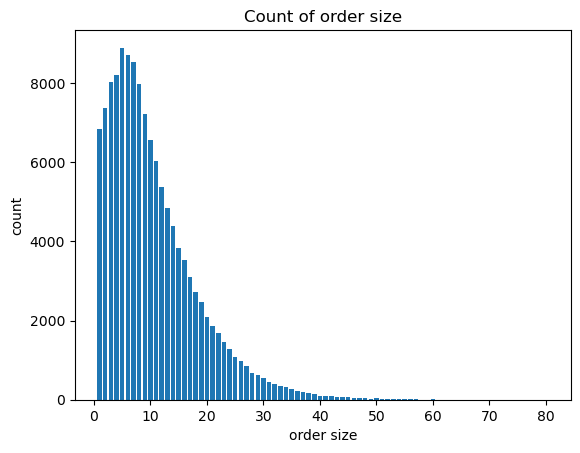

In [109]:
cart_size = order_products.groupby('order_id')['add_to_cart_order'].max()
cart_size = cart_size.value_counts()
plt.bar(cart_size.index, cart_size)
plt.title('Count of order size')
plt.xlabel('order size')
plt.ylabel('count');

We can see that more than 200000 have an order_size between 5 and 15. And less than 50000 have an order_size that is more than 20.

Most Frequent Products: now we will link the id with the add_to_cart_order

In [110]:
add_to_cart = pd.crosstab(order_products_names.product_name, order_products_names.add_to_cart_order)
add_to_cart

add_to_cart_order,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
product_name,,,,,,,,,,,,,,,,,,,,,
#2 Coffee Filters,1,1,0,3,4,1,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
#2 Cone White Coffee Filters,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#2 Mechanical Pencils,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#4 Natural Brown Coffee Filters,0,0,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
& Go! Hazelnut Spread + Pretzel Sticks,0,0,0,2,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,1,1,0,1,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The table shows the number of times the product was added to the cart in that order.

Let's create a for to get a sense of the orders to which products are added to the cart:

In [111]:
for i in range(1,6):
    print('ORDER = ', i)
    print(add_to_cart.sort_values(by = i, ascending=False)[i][:5])
    print('\n')

ORDER =  1
product_name
Banana                    4605
Bag of Organic Bananas    3889
Organic Whole Milk        1144
Organic Avocado            995
Organic Strawberries       900
Name: 1, dtype: int64


ORDER =  2
product_name
Banana                    3199
Bag of Organic Bananas    2867
Organic Strawberries      1082
Organic Avocado           1057
Organic Baby Spinach      1046
Name: 2, dtype: int64


ORDER =  3
product_name
Banana                    2255
Bag of Organic Bananas    1951
Organic Strawberries      1099
Organic Baby Spinach      1049
Organic Avocado            833
Name: 3, dtype: int64


ORDER =  4
product_name
Banana                    1643
Bag of Organic Bananas    1356
Organic Strawberries      1015
Organic Baby Spinach       884
Organic Hass Avocado       719
Name: 4, dtype: int64


ORDER =  5
product_name
Banana                    1326
Bag of Organic Bananas    1003
Organic Strawberries       868
Organic Baby Spinach       809
Large Lemon                700
Name: 5, 

It shows the products that are placed first in the cart.

#Shopping Habits:

In [112]:
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,weekday,hour_8,first_order
1,order_number_1-3,weekday,hour_7,interval_others
2,order_number_4-5,weekday,peak_hours,interval_weekly
3,order_number_4-5,weekday,hour_7,interval_others
4,order_number_6-10,weekday,peak_hours,interval_others


In [113]:
orders_apriori.shape

(3214874, 4)

In order to use the Apriori algorithm it will be necessary to transform the data frame into a list.



In [114]:
trans = []
for i in range(orders_apriori.shape[0]):
    trans.append([str(orders_apriori.values[i, j]) for j in range(orders_apriori.shape[1])])

In [115]:
trans[:4]

[['order_number_1-3', 'weekday', 'hour_8', 'first_order'],
 ['order_number_1-3', 'weekday', 'hour_7', 'interval_others'],
 ['order_number_4-5', 'weekday', 'peak_hours', 'interval_weekly'],
 ['order_number_4-5', 'weekday', 'hour_7', 'interval_others']]

Now on the list we can start creating some rules to be able to notice possible patterns.

In [116]:
from zipfile import ZipFile  # working with zipped input
from mlxtend.frequent_patterns import fpgrowth, association_rules  # MBA
from scipy import sparse  # sparse matrices
import numpy as np
import pandas as pd
##import osimport as os 
import pandas as pd
import numpy as np
!pip install apyori
from apyori import apriori
#from collections import Counter
from datetime import datetime
#from itertools import combinations
import matplotlib.pyplot as plt

In [117]:
start = datetime.now()
rules = apriori(trans, min_support = 0.005, min_confidence = 0.2, min_lift = 2)
results = list(rules)
print('Execution time: ', datetime.now() - start)

Execution time:  0:02:06.409739


In [118]:
results[0]


RelationRecord(items=frozenset({'first_order', 'order_number_1-3'}), support=0.06414217166831422, ordered_statistics=[OrderedStatistic(items_base=frozenset({'first_order'}), items_add=frozenset({'order_number_1-3'}), confidence=1.0, lift=7.795183527392111), OrderedStatistic(items_base=frozenset({'order_number_1-3'}), items_add=frozenset({'first_order'}), confidence=0.5, lift=7.795183527392111)])

In [119]:
#more detailed analysis of the rule:
results[0][0]


frozenset({'first_order', 'order_number_1-3'})

In [120]:
#item 0, position 1:
results[0][1]

0.06414217166831422

In [121]:
#create a vriable r with results in position 0 and position 2:
r = results[0][2]
r

[OrderedStatistic(items_base=frozenset({'first_order'}), items_add=frozenset({'order_number_1-3'}), confidence=1.0, lift=7.795183527392111),
 OrderedStatistic(items_base=frozenset({'order_number_1-3'}), items_add=frozenset({'first_order'}), confidence=0.5, lift=7.795183527392111)]

In [122]:
#it will return the fist rule
r[0]

OrderedStatistic(items_base=frozenset({'first_order'}), items_add=frozenset({'order_number_1-3'}), confidence=1.0, lift=7.795183527392111)

In [123]:
#it will return the second rule
r[1]

OrderedStatistic(items_base=frozenset({'order_number_1-3'}), items_add=frozenset({'first_order'}), confidence=0.5, lift=7.795183527392111)

In [124]:
#it return the fist rule and the confidence, after it will return the fist rule and the lift:
r[0][2], r[0][3]

(1.0, 7.795183527392111)

Now we create a function to transform the data in a data frame to get easier to make a best avaliation of the each rules it was created!

In [125]:
A = []
B = []
support = []
confidence = []
lift = []

for result in results:
  s = result[1]
  result_rules = result[2]
  for result_rule in result_rules:
    a = list(result_rule[0])
    b = list(result_rule[1])
    c = result_rule[2]
    l = result_rule[3]
    A.append(a)
    B.append(b)
    support.append(s)
    confidence.append(c)
    lift.append(l) 

rules_df = pd.DataFrame({
    'A': A,
    'B': B,
    'support': support,
    'confidence': confidence,
    'lift': lift
})

rules_df = rules_df.sort_values(by = 'lift', ascending = False).reset_index(drop = True)
len(rules_df)

38

It returned 38 rules to us

In [126]:
A[0], B[0], A[1], B[1]

(['first_order'], ['order_number_1-3'], ['order_number_1-3'], ['first_order'])

The data frame improves our view of the rules:

In [127]:
rules_df

,A,B,support,confidence,lift
0,"[first_order, peak_hours]","[order_number_1-3, weekend]",0.013600,0.367834,8.057873
1,"[order_number_1-3, weekend]","[first_order, peak_hours]",0.013600,0.297930,8.057873
2,"[first_order, weekend]","[order_number_1-3, peak_hours]",0.013600,0.594952,8.047623
3,"[order_number_1-3, weekend]",[first_order],0.022859,0.500763,7.807082
4,[first_order],"[order_number_1-3, weekend]",0.022859,0.356386,7.807082
5,[first_order],"[order_number_1-3, peak_hours, weekend]",0.013600,0.212032,7.799732
6,"[weekend, order_number_1-3, peak_hours]",[first_order],0.013600,0.500292,7.799732
7,"[order_number_1-3, peak_hours]",[first_order],0.036974,0.500126,7.797151
8,[first_order],"[order_number_1-3, peak_hours]",0.036974,0.576435,7.797151
9,[first_order],"[order_number_1-3, weekday, peak_hours]",0.023374,0.364402,7.795650


Here it is much easier to visualize. Let's look at rule 0: peak_hours andfirst_order, that is, during peak hours and first purchase and their relationship in being weekend and being betweenorder_number_1-3. Here we see the relationship between peak hours being the first purchase and occurring on a weekend where purchases are between 1-3. Let us now look at rule 33, in an interval of more than 30 days and its relationship with being the 4th and 5th purchase. Here shows us more about after 30 days the customers come back to make their purchases 4 or 5 (returning for the fourth or fifth time to make another purchase).

Association between products: Let's repeat the Apriori algorithm, but now manually, realizing the association of products! As we have a large number of products and users, it is easier to do it manually because it would take a long time just setting up the database.

Due to the size of the data, we will only take a sample of 5000 products, even to avoid problems of lack of memory on the machine.

In [128]:
transactions_df = order_products[['order_id', 'product_id']][:5000]
transactions_df

,order_id,product_id
0,1,49302
1,1,11109
2,1,10246
3,1,49683
4,1,43633
...,...,...
4995,12510,6656
4996,12525,37646
4997,12525,42265
4998,12525,48726


In [129]:
n_orders = len(set(transactions_df.order_id))
n_products = len(set(transactions_df.product_id))
print(n_orders, n_products)

479 2856


We have 499 orders and 2809 products.

I will create a dataframe that shows the frequency of products in transactions:

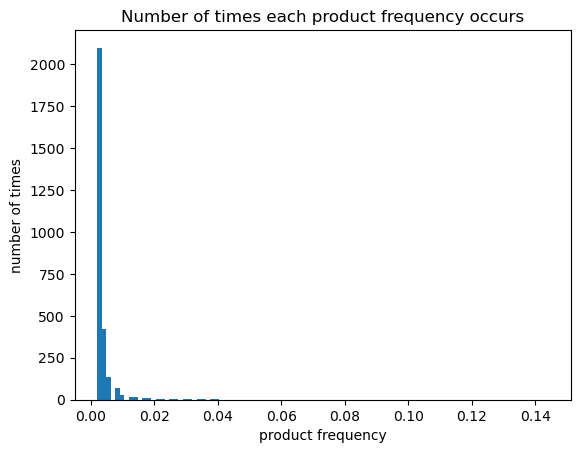

In [130]:
product_frequency = transactions_df.product_id.value_counts() / n_orders
plt.hist(product_frequency, bins = 100)
plt.title('Number of times each product frequency occurs')
plt.xlabel('product frequency')
plt.ylabel('number of times');

The graph shows us that more than 1750 products appear less than 0.02 times. And that less than 250 products appear more than 0.02 times in transactions.

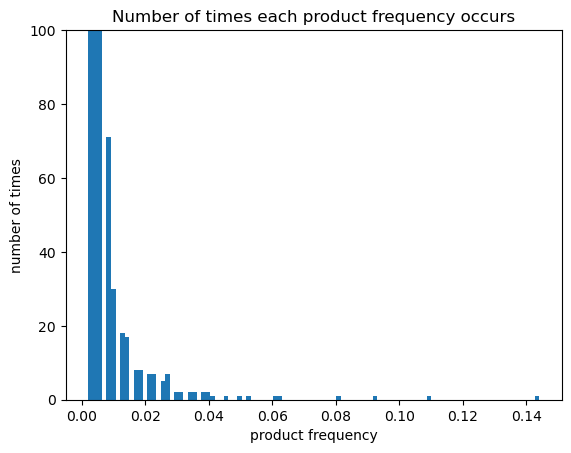

In [131]:
#a zoom:

plt.hist(product_frequency, bins = 100)
plt.title('Number of times each product frequency occurs')
plt.xlabel('product frequency')
plt.ylabel('number of times')
plt.ylim([0, 100]);

We will now do an analysis to be able to later remove the products that appear few times. We will only search for products that appear at least 4 times, and for that you will need a support of 0.01 (0.01 * 499 = 4.99, we can round to 5).

In [132]:
min_support = 0.01
products_apriori = product_frequency[product_frequency >= min_support]
print(products_apriori)

24852    0.144050
21137    0.108559
13176    0.091858
21903    0.081420
47209    0.062630
           ...   
29987    0.010438
11182    0.010438
2966     0.010438
28934    0.010438
37524    0.010438
Name: product_id, Length: 129, dtype: float64


With this filter, we were able to reduce from 2809 products to 149! Let's create a data frame to see better:

In [133]:
transactions_apriori = transactions_df[transactions_df.product_id.isin(products_apriori.index)]
transactions_apriori

,order_id,product_id
3,1,49683
5,1,13176
6,1,47209
7,1,22035
9,36,19660
...,...,...
4985,12480,13176
4987,12510,5450
4992,12510,20995
4996,12525,37646


In [134]:
order_sizes = transactions_apriori.order_id.value_counts()
order_sizes

5933     18
7793     17
878      16
8400     15
10362    15
         ..
7559      1
7367      1
7266      1
3397      1
8116      1
Name: order_id, Length: 367, dtype: int64

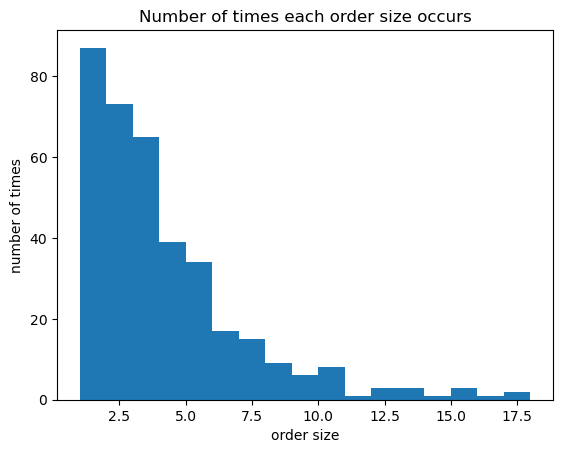

In [135]:
plt.hist(order_sizes, bins = max(order_sizes) - min(order_sizes))
plt.title('Number of times each order size occurs')
plt.xlabel('order size')
plt.ylabel('number of times');

Most orders only have 1 or 2 products! Less than 20 orders you have 8 products! It's kind of weird and there's no point in making membership rules with just 1 product. So let's delete orders that only have a single product.



In [136]:
min_lenght = 2
orders_apriori = order_sizes[order_sizes >= min_lenght]
print(orders_apriori)

5933     18
7793     17
878      16
8400     15
10362    15
         ..
10414     2
3901      2
473       2
6562      2
6552      2
Name: order_id, Length: 280, dtype: int64


In [137]:
transactions_apriori = transactions_apriori[transactions_apriori.order_id.isin(orders_apriori.index)]
transactions_apriori

,order_id,product_id
3,1,49683
5,1,13176
6,1,47209
7,1,22035
9,36,19660
...,...,...
4985,12480,13176
4987,12510,5450
4992,12510,20995
4996,12525,37646


Let's make all possible combinations:

In [138]:
from zipfile import ZipFile  # working with zipped input
!pip install mlxtend
from mlxtend.frequent_patterns import fpgrowth, association_rules  # MBA
from scipy import sparse  # sparse matrices
import numpy as np
import pandas as pd
##import osimport as os 
import pandas as pd
import numpy as np
!pip install apyori
from apyori import apriori
#from collections import Counter
from datetime import datetime
!pip install itertools
from itertools import combinations
import matplotlib.pyplot as plt

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


In [139]:
transactions_by_order = transactions_apriori.groupby('order_id')['product_id']
for order_id, order_list in transactions_by_order:
  print('Order_id:', order_id, '\nOrder_list: ', list(order_list))
  product_combinations = combinations(order_list, 2)
  print('Product combinations:')
  print([i for i in product_combinations])
  print('\n')

Order_id: 1 
Order_list:  [49683, 13176, 47209, 22035]
Product combinations:
[(49683, 13176), (49683, 47209), (49683, 22035), (13176, 47209), (13176, 22035), (47209, 22035)]


Order_id: 36 
Order_list:  [19660, 49235, 48679, 46979]
Product combinations:
[(19660, 49235), (19660, 48679), (19660, 46979), (49235, 48679), (49235, 46979), (48679, 46979)]


Order_id: 38 
Order_list:  [21616, 28842]
Product combinations:
[(21616, 28842)]


Order_id: 96 
Order_list:  [30391, 40706, 27966, 39275]
Product combinations:
[(30391, 40706), (30391, 27966), (30391, 39275), (40706, 27966), (40706, 39275), (27966, 39275)]


Order_id: 98 
Order_list:  [13176, 35951, 27966, 30776, 27344, 24964, 34126, 22935, 45007, 25659]
Product combinations:
[(13176, 35951), (13176, 27966), (13176, 30776), (13176, 27344), (13176, 24964), (13176, 34126), (13176, 22935), (13176, 45007), (13176, 25659), (35951, 27966), (35951, 30776), (35951, 27344), (35951, 24964), (35951, 34126), (35951, 22935), (35951, 45007), (35951, 25

In this code it returns the order id, the products and the combinations of those products. Now let's put all the combinations together and then count the number of occurrences:

In [140]:
def product_combinations(transactions_df, max_length = 5):
  transactions_by_order = transactions_df.groupby('order_id')['product_id']
  max_length_reference = max_length
  for order_id, order_list in transactions_by_order:
    max_length = min(max_length_reference, len(order_list))
    order_list = sorted(order_list)
    for l in range(2, max_length + 1):
      product_combinations = combinations(order_list, l)
      for combination in product_combinations:
        yield combination

In [141]:
combs = product_combinations(transactions_apriori)
combs

<generator object product_combinations at 0x7fb198ff7190>

In [142]:
#view all combinations of products that have been generated:

for _ in range(100):
  print(next(iter(combs)))

(13176, 22035)
(13176, 47209)
(13176, 49683)
(22035, 47209)
(22035, 49683)
(47209, 49683)
(13176, 22035, 47209)
(13176, 22035, 49683)
(13176, 47209, 49683)
(22035, 47209, 49683)
(13176, 22035, 47209, 49683)
(19660, 46979)
(19660, 48679)
(19660, 49235)
(46979, 48679)
(46979, 49235)
(48679, 49235)
(19660, 46979, 48679)
(19660, 46979, 49235)
(19660, 48679, 49235)
(46979, 48679, 49235)
(19660, 46979, 48679, 49235)
(21616, 28842)
(27966, 30391)
(27966, 39275)
(27966, 40706)
(30391, 39275)
(30391, 40706)
(39275, 40706)
(27966, 30391, 39275)
(27966, 30391, 40706)
(27966, 39275, 40706)
(30391, 39275, 40706)
(27966, 30391, 39275, 40706)
(13176, 22935)
(13176, 24964)
(13176, 25659)
(13176, 27344)
(13176, 27966)
(13176, 30776)
(13176, 34126)
(13176, 35951)
(13176, 45007)
(22935, 24964)
(22935, 25659)
(22935, 27344)
(22935, 27966)
(22935, 30776)
(22935, 34126)
(22935, 35951)
(22935, 45007)
(24964, 25659)
(24964, 27344)
(24964, 27966)
(24964, 30776)
(24964, 34126)
(24964, 35951)
(24964, 45007)
(256

In [143]:
from zipfile import ZipFile  # working with zipped input
from mlxtend.frequent_patterns import fpgrowth, association_rules  # MBA
from scipy import sparse  # sparse matrices


!pip install Counter
from collections import Counter



In [144]:
#how often each of these combinations appears:

combs = product_combinations(transactions_apriori)
counter = Counter(combs).items()
combinations_count = pd.Series([x[1] for x in counter], index = [x[0] for x in counter])
combinations_frequency = combinations_count / n_orders
print(combinations_frequency)

(13176, 22035)                 0.008351
(13176, 47209)                 0.022965
(13176, 49683)                 0.004175
(22035, 47209)                 0.004175
(22035, 49683)                 0.002088
                                 ...   
(5876, 13176, 22935, 27104)    0.002088
(13176, 16797)                 0.002088
(13176, 16797, 47766)          0.002088
(5450, 20995)                  0.002088
(37646, 42265)                 0.002088
Length: 71435, dtype: float64


In [145]:
combinations_apriori = combinations_frequency[combinations_frequency >= min_support]
combinations_apriori = combinations_apriori[combinations_apriori.index.map(len) >= min_lenght]
print(combinations_apriori, len(combinations_apriori))

(13176, 47209)           0.022965
(13176, 24964)           0.010438
(13176, 27966)           0.010438
(24964, 34126)           0.012526
(27104, 47209)           0.010438
(13176, 21137)           0.022965
(21137, 31717)           0.012526
(21137, 30391)           0.012526
(10749, 21903)           0.010438
(21137, 21903)           0.014614
(21137, 24852)           0.027140
(21137, 26209)           0.014614
(21137, 47209)           0.016701
(21616, 21903)           0.014614
(21616, 24852)           0.010438
(21616, 24964)           0.010438
(21903, 24852)           0.018789
(21903, 24964)           0.010438
(21903, 26209)           0.020877
(21903, 40706)           0.014614
(21903, 47209)           0.010438
(21903, 48679)           0.012526
(24852, 26209)           0.016701
(24852, 27104)           0.010438
(24852, 40706)           0.010438
(24852, 45066)           0.014614
(26209, 31717)           0.010438
(26209, 47209)           0.010438
(26209, 48679)           0.010438
(31717, 47209)

Let's create a code so that it can perform the combinations for the entire database:

In [146]:
A = []
B = []
AB = []
for c in combinations_apriori.index:
  c_length = len(c)
  for l in range(1, c_length):
    comb = combinations(c, l)
    for a in comb:
      AB.append(c)
      b = list(c)
      for e in a:
        b.remove(e)
      b = tuple(b)
      if len(a) == 1:
        a = a[0]
      A.append(a)
      if len(b) == 1:
        b = b[0]
      B.append(b)

In [147]:
apriori_df = pd.DataFrame({'A': A,
                           'B': B,
                           'AB': AB})

In [148]:
apriori_df.head()

,A,B,AB
0,13176,47209,"(13176, 47209)"
1,47209,13176,"(13176, 47209)"
2,13176,24964,"(13176, 24964)"
3,24964,13176,"(13176, 24964)"
4,13176,27966,"(13176, 27966)"


In [149]:
products_apriori


24852    0.144050
21137    0.108559
13176    0.091858
21903    0.081420
47209    0.062630
           ...   
29987    0.010438
11182    0.010438
2966     0.010438
28934    0.010438
37524    0.010438
Name: product_id, Length: 129, dtype: float64

In [150]:
combinations_frequency

(13176, 22035)                 0.008351
(13176, 47209)                 0.022965
(13176, 49683)                 0.004175
(22035, 47209)                 0.004175
(22035, 49683)                 0.002088
                                 ...   
(5876, 13176, 22935, 27104)    0.002088
(13176, 16797)                 0.002088
(13176, 16797, 47766)          0.002088
(5450, 20995)                  0.002088
(37646, 42265)                 0.002088
Length: 71435, dtype: float64

In [151]:
support = {**{k: v for k, v in products_apriori.items()},
           **{k: v for k, v in combinations_frequency.items()}}
support


{24852: 0.1440501043841336,
 21137: 0.10855949895615867,
 13176: 0.0918580375782881,
 21903: 0.081419624217119,
 47209: 0.06263048016701461,
 47626: 0.060542797494780795,
 16797: 0.05219206680584551,
 26209: 0.05010438413361169,
 47766: 0.04592901878914405,
 27966: 0.04175365344467641,
 22935: 0.03966597077244259,
 30391: 0.03966597077244259,
 24964: 0.037578288100208766,
 27845: 0.037578288100208766,
 40706: 0.03549060542797495,
 45007: 0.03549060542797495,
 27104: 0.033402922755741124,
 39275: 0.033402922755741124,
 42265: 0.031315240083507306,
 44632: 0.031315240083507306,
 19057: 0.029227557411273485,
 45066: 0.029227557411273485,
 21616: 0.027139874739039668,
 24184: 0.027139874739039668,
 9387: 0.027139874739039668,
 10749: 0.027139874739039668,
 34969: 0.027139874739039668,
 31717: 0.027139874739039668,
 5077: 0.027139874739039668,
 28204: 0.025052192066805846,
 31506: 0.025052192066805846,
 34126: 0.025052192066805846,
 48679: 0.025052192066805846,
 5450: 0.025052192066805846,


In [152]:
#updating thevapriori_df with the news combinations:

apriori_df[['support_A', 'support_B', 'support_AB']] = apriori_df[['A', 'B', 'AB']].applymap(lambda x: support[x])
apriori_df

,A,B,AB,support_A,support_B,support_AB
0,13176,47209,"(13176, 47209)",0.091858,0.062630,0.022965
1,47209,13176,"(13176, 47209)",0.062630,0.091858,0.022965
2,13176,24964,"(13176, 24964)",0.091858,0.037578,0.010438
3,24964,13176,"(13176, 24964)",0.037578,0.091858,0.010438
4,13176,27966,"(13176, 27966)",0.091858,0.041754,0.010438
...,...,...,...,...,...,...
117,47626,26209,"(26209, 47626)",0.060543,0.050104,0.010438
118,21137,47626,"(21137, 47626)",0.108559,0.060543,0.010438
119,47626,21137,"(21137, 47626)",0.060543,0.108559,0.010438
120,21903,39877,"(21903, 39877)",0.081420,0.022965,0.010438


In [153]:
apriori_df.drop('AB', axis = 1, inplace=True)
apriori_df.head()

,A,B,support_A,support_B,support_AB
0,13176,47209,0.091858,0.062630,0.022965
1,47209,13176,0.062630,0.091858,0.022965
2,13176,24964,0.091858,0.037578,0.010438
3,24964,13176,0.037578,0.091858,0.010438
4,13176,27966,0.091858,0.041754,0.010438


In [154]:
#generating confidence and lift:

apriori_df['confidence'] = apriori_df.support_AB / apriori_df.support_A
apriori_df['lift'] = apriori_df.confidence / apriori_df.support_B
apriori_df

,A,B,support_A,support_B,support_AB,confidence,lift
0,13176,47209,0.091858,0.062630,0.022965,0.250000,3.991667
1,47209,13176,0.062630,0.091858,0.022965,0.366667,3.991667
2,13176,24964,0.091858,0.037578,0.010438,0.113636,3.023990
3,24964,13176,0.037578,0.091858,0.010438,0.277778,3.023990
4,13176,27966,0.091858,0.041754,0.010438,0.113636,2.721591
...,...,...,...,...,...,...,...
117,47626,26209,0.060543,0.050104,0.010438,0.172414,3.441092
118,21137,47626,0.108559,0.060543,0.010438,0.096154,1.588196
119,47626,21137,0.060543,0.108559,0.010438,0.172414,1.588196
120,21903,39877,0.081420,0.022965,0.010438,0.128205,5.582751


In [155]:
min_confidence = 0.2
min_lift = 1.0
apriori_df = apriori_df[apriori_df.confidence >= min_confidence]
apriori_df = apriori_df[apriori_df.lift >= min_lift]
apriori_df = apriori_df.sort_values(by = 'lift', ascending=False).reset_index(drop = True) #ordering by the lift
apriori_df.head()

,A,B,support_A,support_B,support_AB,confidence,lift
0,48679,"(21903, 26209)",0.025052,0.020877,0.010438,0.416667,19.958333
1,"(21903, 26209)",48679,0.020877,0.025052,0.010438,0.500000,19.958333
2,26209,"(21903, 48679)",0.050104,0.012526,0.010438,0.208333,16.631944
3,"(21903, 48679)",26209,0.012526,0.050104,0.010438,0.833333,16.631944
4,"(21137, 21903)",26209,0.014614,0.050104,0.010438,0.714286,14.255952


Now it is easy to understand that whoever takes A - 12341 also takes B - 16797, we have the support of each of these A and B instances, and AB support as well as the lift!

In [156]:
#getting the names of the products:

def convert_product_id_to_name(product_ids):
  if type(product_ids) == int:
    return products_id_to_name[product_ids]
  names = []
  for prod in product_ids:
    name = products_id_to_name[prod]
    names.append(name)
  names = tuple(names)
  return names

In [157]:
#applying the names in the data frame:

apriori_df[['A', 'B']] = apriori_df[['A', 'B']].applymap(convert_product_id_to_name)
apriori_df

,A,B,support_A,support_B,support_AB,confidence,lift
0,Organic Garnet Sweet Potato (Yam),"(Organic Baby Spinach, Limes)",0.025052,0.020877,0.010438,0.416667,19.958333
1,"(Organic Baby Spinach, Limes)",Organic Garnet Sweet Potato (Yam),0.020877,0.025052,0.010438,0.500000,19.958333
2,Limes,"(Organic Baby Spinach, Organic Garnet Sweet Po...",0.050104,0.012526,0.010438,0.208333,16.631944
3,"(Organic Baby Spinach, Organic Garnet Sweet Po...",Limes,0.012526,0.050104,0.010438,0.833333,16.631944
4,"(Organic Strawberries, Organic Baby Spinach)",Limes,0.014614,0.050104,0.010438,0.714286,14.255952
...,...,...,...,...,...,...,...
64,Organic Whole Milk,Banana,0.037578,0.144050,0.010438,0.277778,1.928341
65,Organic Strawberries,Banana,0.108559,0.144050,0.027140,0.250000,1.735507
66,Organic Baby Spinach,Banana,0.081420,0.144050,0.018789,0.230769,1.602007
67,Organic Avocado,Banana,0.045929,0.144050,0.010438,0.227273,1.577734


Now we have our final dataframe to apply the rules.

The fuction to generate association rules: Put all the results together to create this function

In [158]:
def association_rules(order_products, min_support, min_length = 2, max_length = 5, 
                      min_confidence = 0.2, min_lift = 1.0):
    
    print('Loading data...')
    transactions_df = order_products[['order_id', 'product_id']]
    print('Calculating product supports...')
    n_orders = len(set(transactions_df.order_id))
    product_frequency = transactions_df.product_id.value_counts()/n_orders
    products_apriori = product_frequency[product_frequency >= min_support]
    transactions_apriori = transactions_df[transactions_df.product_id.isin(products_apriori.index)]
    
    order_sizes = transactions_apriori.order_id.value_counts()
    orders_apriori = order_sizes[order_sizes >= min_length]
    transactions_apriori = transactions_apriori[transactions_apriori.order_id.isin(orders_apriori.index)]
    
    print('Calculating product combinations and supports...')
    
    def product_combinations(transactions_df, max_length = max_length):
        transactions_by_order = transactions_df.groupby('order_id')['product_id']
        max_length_reference = max_length
        for order_id, order_list in transactions_by_order:
            max_length = min(max_length_reference, len(order_list))
            order_list = sorted(order_list)
            for l in range(2, max_length + 1):
                product_combinations = combinations(order_list, l)
                for combination in product_combinations:
                    yield combination
   
    combs = product_combinations(transactions_apriori)
    counter = Counter(combs).items()
    combinations_count = pd.Series([x[1] for x in counter], index = [x[0] for x in counter])
    combinations_frequency = combinations_count/n_orders
    combinations_apriori = combinations_frequency[combinations_frequency >= min_support]
    combinations_apriori = combinations_apriori[combinations_apriori.index.map(len) >= min_length]
    
    print('Populating dataframe...')
    A = []
    B = []
    AB = []
    for c in combinations_apriori.index:
        c_length = len(c)
        for l in range(1, c_length):
            comb = combinations(c, l)
            for a in comb:
                AB.append(c)
                b = list(c)
                for e in a:
                    b.remove(e)
                b = tuple(b)
                if len(a) == 1:
                    a = a[0]
                A.append(a)
                if len(b) == 1:
                    b = b[0]
                B.append(b)
            
    apriori_df = pd.DataFrame({'A': A,
                               'B': B,
                               'AB': AB})
    support = {**{k: v for k, v in products_apriori.items()}, 
               **{k: v for k, v in combinations_frequency.items()}}
    apriori_df[['support_A', 'support_B', 'support_AB']] = apriori_df[['A', 'B', 'AB']].applymap(lambda x: support[x])
    apriori_df.drop('AB', axis = 1, inplace = True)
    apriori_df['confidence'] = apriori_df.support_AB/apriori_df.support_A
    apriori_df['lift'] = apriori_df.confidence / apriori_df.support_B
    apriori_df = apriori_df[apriori_df.confidence >= min_confidence]
    apriori_df = apriori_df[apriori_df.lift >= min_lift]
    apriori_df = apriori_df.sort_values(by = 'lift', ascending = False).reset_index(drop = True)
    
    def convert_product_id_to_name(product_ids):
        if type(product_ids) == int:
            return products_id_to_name[product_ids]
        names = []
        for prod in product_ids:
            name = products_id_to_name[prod]
            names.append(name)
        names = tuple(names)
        return names
    
    apriori_df[['A', 'B']] = apriori_df[['A', 'B']].applymap(convert_product_id_to_name)

    print('{} rules were generated'.format(len(apriori_df)))

    return apriori_df

Let's now apply the function:

In [159]:
start = datetime.now()
rules = association_rules(order_products, min_support = 0.01)
print('Execution time: ', datetime.now() - start)

Loading data...
Calculating product supports...
Calculating product combinations and supports...
Populating dataframe...
12 rules were generated
Execution time:  0:00:08.944880


In [160]:
rules

,A,B,support_A,support_B,support_AB,confidence,lift
0,Limes,Large Lemon,0.045980,0.062000,0.012156,0.264379,4.264159
1,Organic Raspberries,Organic Strawberries,0.042268,0.083028,0.012728,0.301118,3.626710
2,Organic Hass Avocado,Bag of Organic Bananas,0.055583,0.117980,0.018444,0.331825,2.812560
3,Organic Raspberries,Bag of Organic Bananas,0.042268,0.117980,0.013566,0.320952,2.720400
4,Organic Hass Avocado,Organic Strawberries,0.055583,0.083028,0.011729,0.211024,2.541609
5,Organic Strawberries,Bag of Organic Bananas,0.083028,0.117980,0.023428,0.282174,2.391714
6,Strawberries,Banana,0.049494,0.142719,0.014847,0.299969,2.101819
7,Organic Avocado,Banana,0.056467,0.142719,0.016889,0.299096,2.095698
8,Organic Baby Spinach,Bag of Organic Bananas,0.074568,0.117980,0.017042,0.228536,1.937082
9,Large Lemon,Banana,0.062000,0.142719,0.016447,0.265274,1.858714


In this first example, we were able to see the presence of Banana and organic foods strongly. We can conclude that customers tend to take organic food accompanied by Banana in their purchase.

In [161]:
#Example two
start = datetime.now()
rules = association_rules(order_products, min_support = 0.009, max_length = 4)
print('Execution time: ', datetime.now() - start)

Loading data...
Calculating product supports...
Calculating product combinations and supports...
Populating dataframe...
16 rules were generated
Execution time:  0:00:04.804482


In [162]:
rules

,A,B,support_A,support_B,support_AB,confidence,lift
0,Limes,Large Lemon,0.045980,0.062000,0.012156,0.264379,4.264159
1,Organic Raspberries,Organic Strawberries,0.042268,0.083028,0.012728,0.301118,3.626710
2,Organic Blueberries,Organic Strawberries,0.037848,0.083028,0.009672,0.255538,3.077735
3,Organic Hass Avocado,Bag of Organic Bananas,0.055583,0.117980,0.018444,0.331825,2.812560
4,Organic Raspberries,Bag of Organic Bananas,0.042268,0.117980,0.013566,0.320952,2.720400
5,Organic Fuji Apple,Banana,0.024823,0.142719,0.009222,0.371508,2.603072
6,Organic Hass Avocado,Organic Strawberries,0.055583,0.083028,0.011729,0.211024,2.541609
7,Honeycrisp Apple,Banana,0.027064,0.142719,0.009382,0.346663,2.428991
8,Organic Strawberries,Bag of Organic Bananas,0.083028,0.117980,0.023428,0.282174,2.391714
9,Organic Cucumber,Bag of Organic Bananas,0.035158,0.117980,0.009664,0.274875,2.329853


unlike the previous example, here it shows just a few more new rules. Keeping the set formed by organic products and the chance of Banana being taken too. It is clear that there is a pattern in the consumption of these food products: they are all healthy and natural. Another similarity is that they are from the same family of foods: fruits, vegetables, greens...

In [163]:
start = datetime.now()
rules = association_rules(order_products, min_support = 0.002, max_length=3)
print('Execution time: ', datetime.now() - start)

Loading data...
Calculating product supports...
Calculating product combinations and supports...
Populating dataframe...
267 rules were generated
Execution time:  0:00:15.372798


In [164]:
rules.head(20)

,A,B,support_A,support_B,support_AB,confidence,lift
0,Yellow Bell Pepper,Orange Bell Pepper,0.008887,0.014206,0.003018,0.339623,23.906409
1,Orange Bell Pepper,Yellow Bell Pepper,0.014206,0.008887,0.003018,0.212446,23.906409
2,Organic Bell Pepper,Organic Red Bell Pepper,0.007187,0.018238,0.002134,0.296925,16.280482
3,Sparkling Lemon Water,Lime Sparkling Water,0.010845,0.014984,0.002500,0.230499,15.383284
4,Blackberries,Raspberries,0.008208,0.024991,0.002248,0.273909,10.960453
5,Lime Sparkling Water,Sparkling Water Grapefruit,0.014984,0.025600,0.003849,0.256867,10.033709
6,Sparkling Lemon Water,Sparkling Water Grapefruit,0.010845,0.025600,0.002507,0.231202,9.031183
7,"(Bag of Organic Bananas, Organic Garlic)",Organic Yellow Onion,0.006951,0.032696,0.002043,0.293860,8.987653
8,"(Bag of Organic Bananas, Organic Yellow Onion)",Organic Garlic,0.007621,0.031690,0.002043,0.268000,8.456953
9,Organic Ginger Root,Organic Garlic,0.015296,0.031690,0.003384,0.221226,6.980953


Here the lift and the confidence already show higher values. If we analyze the first 7 rules we see that the proportion of one occurring, and the other also occurring is very high, showing a preferable relationship between such products. Rules 11 to 14 show a taste for flavored waters. It shows the habit of occurrence among the products, where one is taken, the chances of taking the other is high. Showing that possibly consumers take more than one flavored water, this explains the high chances of being taken one if the other is also taken.


In [165]:
start = datetime.now()
rules = association_rules(order_products, min_support = 0.001, max_length=2)
print('Execution time: ', datetime.now() - start)

Loading data...
Calculating product supports...
Calculating product combinations and supports...
Populating dataframe...
474 rules were generated
Execution time:  0:00:03.866641


In [166]:
rules.head(20)

,A,B,support_A,support_B,support_AB,confidence,lift
0,Strawberry Rhubarb Yoghurt,Blueberry Yoghurt,0.003864,0.003856,0.001197,0.309665,80.298014
1,Blueberry Yoghurt,Strawberry Rhubarb Yoghurt,0.003856,0.003864,0.001197,0.310277,80.298014
2,Nonfat Icelandic Style Strawberry Yogurt,Icelandic Style Skyr Blueberry Non-fat Yogurt,0.002759,0.005373,0.001166,0.422652,78.660621
3,Icelandic Style Skyr Blueberry Non-fat Yogurt,Nonfat Icelandic Style Strawberry Yogurt,0.005373,0.002759,0.001166,0.217021,78.660621
4,Icelandic Style Skyr Blueberry Non-fat Yogurt,Non Fat Acai & Mixed Berries Yogurt,0.005373,0.003201,0.001288,0.239716,74.887947
5,Non Fat Acai & Mixed Berries Yogurt,Icelandic Style Skyr Blueberry Non-fat Yogurt,0.003201,0.005373,0.001288,0.402381,74.887947
6,Blackberry Cucumber Sparkling Water,Kiwi Sandia Sparkling Water,0.003948,0.003544,0.001014,0.256757,72.449026
7,Kiwi Sandia Sparkling Water,Blackberry Cucumber Sparkling Water,0.003544,0.003948,0.001014,0.286022,72.449026
8,Non Fat Raspberry Yogurt,Icelandic Style Skyr Blueberry Non-fat Yogurt,0.004390,0.005373,0.001677,0.381944,71.084466
9,Icelandic Style Skyr Blueberry Non-fat Yogurt,Non Fat Raspberry Yogurt,0.005373,0.004390,0.001677,0.312057,71.084466


In this other example, there is a high frequency of yogurt. Rules 2 and 3 bring us back to the waters but the yorgutes show a similar relationship to the previous case, consumers tend to always catch a yorgute if they have already caught another one. Here the lift is even greater than in the example shown above, the chances of these products being taken together are even higher.

Now taking a look at the last 10 rules:

In [167]:
rules.tail(10)

,A,B,support_A,support_B,support_AB,confidence,lift
464,Organic Baby Spinach,Banana,0.074568,0.142719,0.015243,0.204415,1.432294
465,Organic American Cheese Singles,Banana,0.005305,0.142719,0.001082,0.204023,1.429545
466,Organic Creamy Peanut Butter,Banana,0.005792,0.142719,0.001181,0.203947,1.429015
467,Macaroni & Cheese,Banana,0.005426,0.142719,0.001105,0.203652,1.426943
468,Organic Baby Arugula,Banana,0.022277,0.142719,0.004527,0.203216,1.423889
469,Organic Sticks Low Moisture Part Skim Mozzarel...,Banana,0.010228,0.142719,0.002065,0.201937,1.414931
470,Shredded Parmesan,Banana,0.010091,0.142719,0.002035,0.201662,1.412999
471,Sour Cream,Banana,0.007789,0.142719,0.001570,0.201566,1.412326
472,Peach Pear Flavored Sparkling Water,Banana,0.006852,0.142719,0.001379,0.201335,1.410709
473,Grated Parmesan,Banana,0.012911,0.142719,0.002584,0.200118,1.402184


Banana reappears, here it is taken if another product has already been ordered. As in the first example, there are purchases of organic products that increase the chances of taking the banana together. But here it already brings curiosities about the consumption of the products, if we notice rule number 389, Parmesan Grated and Banana together, it seems an interesting choice.

However, it was possible to perceive certain patterns of purchases such as organic products accompanied by bananas, in addition to cold products such as yorgut which are often bought together. There is a pattern of products from the same department, such as organic food products, mostly fruits, always bought together with other food products. Just like flavored waters always bought together. Looking at the latest rules, the Banana appears, as seen previously, the Banana is frequent in the carts and still tends to be the first product to be added to the cart. This suggests that the market has a great demand for organic and healthy food products, as seen in the examples, these orders are protagonists in the market basket.

INSTA CART CONSUMER ANALYSIS

In [168]:

!pip install mlxtend --upgrade --no-deps -qq
!pip install squarify pywaffle -qq
import squarify
from pywaffle import Waffle

In [169]:
pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/orders.csv')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [170]:
aisles_df = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/aisles.csv')
print(aisles_df.shape)
dpmt_df = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/departments.csv')
print(dpmt_df.shape)
products_df = pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/products.csv')
print(products_df.shape)


                                                                               

(134, 2)
(21, 2)
(49688, 4)


In [171]:

products = pd.merge(left=products_df, right=dpmt_df, on='department_id', how='left')
products = pd.merge(left=products, right=aisles_df, on='aisle_id', how='left')
products.head()    

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


#Waffle Chart to represent the Product Distribution in each Department


                                   CUSTOMER SEGMENTATION 

In [172]:
cust_seg = pd.merge(pd.read_csv(r'/Users/poojabj/Documents/Instacart Analysis/order_products__prior.csv'), products, on='product_id')
pd.merge(cust_seg, orders, on='order_id', how="inner")
cust_seg = cust_seg.drop_duplicates()
cust_seg.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs,eggs


In [173]:
f"There are {cust_seg.department.nunique()} Departments with {cust_seg.product_name.nunique()} Products along {cust_seg.aisle.nunique()}"

'There are 21 Departments with 49677 Products along 134'

<AxesSubplot:>

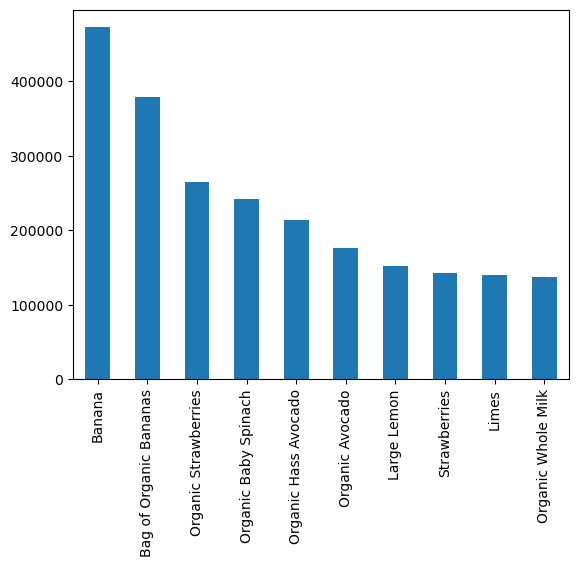

In [174]:
cust_seg.product_name.value_counts().nlargest(10).plot(kind='bar')

<AxesSubplot:>

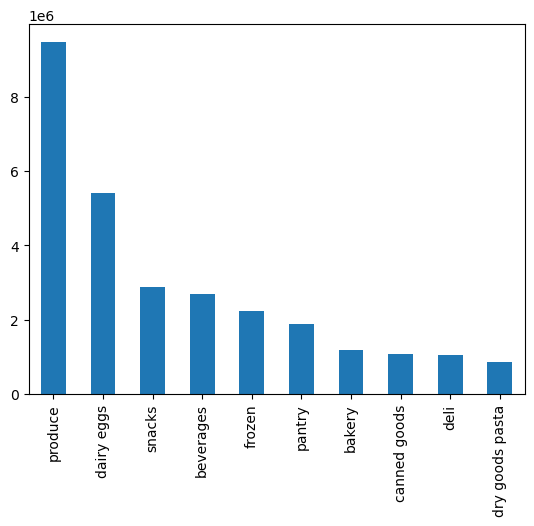

In [175]:
cust_seg.department.value_counts().nlargest(10).plot(kind='bar')

<AxesSubplot:>

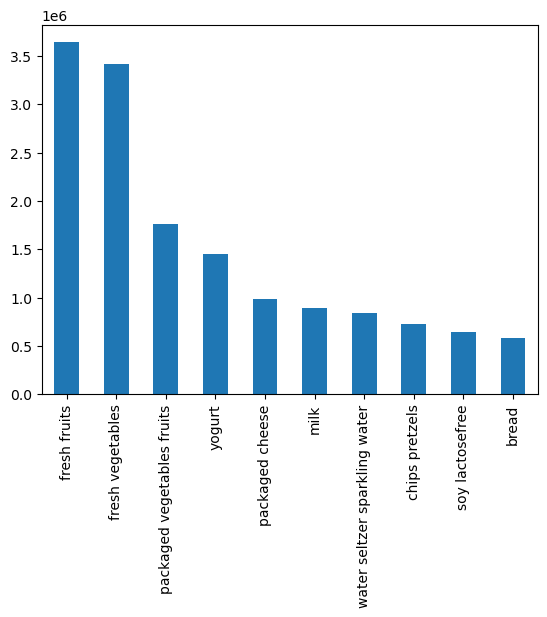

In [176]:
cust_seg.aisle.value_counts().nlargest(10).plot(kind='bar')